In [64]:
# notebook dependencies

# ignore all warning messages
import warnings
warnings.simplefilter("ignore")

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

import os # for caching purposeses
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# plotly module/library
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook_connected"

# importing acquire and prepapre.py files
from acquire import get_reddit_stress
import prepare
from prepare import mass_text_clean

# regular expression import
import re

# JSON import
import json

# importing BeautifulSoup for parsing HTML/XTML
from bs4 import BeautifulSoup

# request module for connecting to APIs
from requests import get

# uni-code library
import unicodedata

# natural language toolkit library/modules
import nltk
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer

from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

from pprint import pprint

In [65]:
# obtain subreddit text data 

def get_reddit_stress():
    
    # cached filename to look for
    filename = "stress.csv"

    # search for filename in local/OS directory
    if os.path.isfile(filename):

        # if file and filename exists, then return csv as Pandas df
        # future iteration: consider using relative path 
        # this may help to prevent referencing deleted/incorrect files
        df = pd.read_csv(filename, index_col = "social_timestamp")

        # print df shape
        print(f'dataframe shape: {df.shape}')

        # return the dataframe
        return df

    # if file/csv can't be found in OS directory, then access the data and cache it as a csv locally
    else:

        url = "https://raw.githubusercontent.com/amankharwal/Website-data/master/stress.csv"

        # read text data as csv and convert to pandas dataframe
        df = pd.read_csv(url)

        # let's move forward with just the following columns/features
        df = df[[
            "label", 
            "post_id",
            "subreddit",                                 
            "sentence_range",              
            "text",                        
            "id",              
            "confidence",            
            "social_timestamp",           
            "social_karma",                
            "syntax_ari",
            "sentiment",
            "social_upvote_ratio",
            "social_num_comments"
            ]]

        # timestamp appears to be in "epoch seconds format"
        df["social_timestamp"] = pd.to_datetime(df['social_timestamp'], unit = 's')

        # sort and set data as index
        df.set_index('social_timestamp', inplace = True)

        # cache the data for easier/quicker reference
        df.to_csv("stress.csv")

        # print the shape
        print(f'dataframe shape: {df.shape}')

        # return the dataframe
        return df

In [66]:
# testing out the created function 

df = get_reddit_stress()
df.head()

dataframe shape: (2838, 12)


label post_id         subreddit sentence_range  \
social_timestamp                                                      
2018-03-21 06:39:13      1  8601tu              ptsd       (15, 20)   
2018-05-22 17:23:37      0  8lbrx9        assistance         (0, 5)   
2018-09-03 00:46:45      1  9ch1zh              ptsd       (15, 20)   
2018-01-20 06:25:55      1  7rorpp     relationships        [5, 10]   
2018-10-17 20:43:25      1  9p2gbc  survivorsofabuse         [0, 5]   

                                                                  text     id  \
social_timestamp                                                                
2018-03-21 06:39:13  He said he had not felt that way before, sugge...  33181   
2018-05-22 17:23:37  Hey there r/assistance, Not sure if this is th...   2606   
2018-09-03 00:46:45  My mom then hit me with the newspaper and it s...  38816   
2018-01-20 06:25:55  until i met my new boyfriend, he is amazing, h...    239   
2018-10-17 20:43:25  October is Domestic Violence Awareness Month a...   1421   

                     confidence  social_karma  syntax_ari  sentiment  \
social_timestamp                                                       
2018-03-21 06:39:13         0.8             5    1.806818  -0.002742   
2018-05-22 17:23:37         1.0             4    9.429737   0.292857   
2018-09-03 00:46:45         0.8             2    7.769821   0.011894   
2018-01-20 06:25:55         0.6             0    2.667798   0.141671   
2018-10-17 20:43:25         0.8            24    7.554238  -0.204167   

                     social_upvote_ratio  social_num_comments  
social_timestamp                                               
2018-03-21 06:39:13                 0.86                    1  
2018-05-22 17:23:37                 0.65                    2  
2018-09-03 00:46:45                 0.67                    0  
2018-01-20 06:25:55                 0.50                    5  
2018-10-17 20:43:25                 1.00                    1

In [67]:
# df info

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2838 entries, 2018-03-21 06:39:13 to 2017-03-07 17:58:36
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   label                2838 non-null   int64  
 1   post_id              2838 non-null   object 
 2   subreddit            2838 non-null   object 
 3   sentence_range       2838 non-null   object 
 4   text                 2838 non-null   object 
 5   id                   2838 non-null   int64  
 6   confidence           2838 non-null   float64
 7   social_karma         2838 non-null   int64  
 8   syntax_ari           2838 non-null   float64
 9   sentiment            2838 non-null   float64
 10  social_upvote_ratio  2838 non-null   float64
 11  social_num_comments  2838 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 288.2+ KB


In [68]:
# df shape

df.shape

(2838, 12)

In [69]:
# column names to list

df.columns.tolist()

['label',
 'post_id',
 'subreddit',
 'sentence_range',
 'text',
 'id',
 'confidence',
 'social_karma',
 'syntax_ari',
 'sentiment',
 'social_upvote_ratio',
 'social_num_comments']

In [70]:
# what is the percentage of missing values by ea. column/feature?

with pd.option_context("display.max_rows", False):
    print(df.isnull().mean()) # no features contain missing values

label                  0.0
post_id                0.0
subreddit              0.0
sentence_range         0.0
text                   0.0
id                     0.0
confidence             0.0
social_karma           0.0
syntax_ari             0.0
sentiment              0.0
social_upvote_ratio    0.0
social_num_comments    0.0
dtype: float64


In [71]:
# # let's move forward with the following columns/features

# df = df[[
#     "label", 
#     "post_id",
#     "subreddit",                                 
#     "sentence_range",              
#     "text",                        
#     "id",              
#     "confidence",            
#     "social_timestamp",           
#     "social_karma",                
#     "syntax_ari",
#     "sentiment",
#     "social_upvote_ratio",
#     "social_num_comments"
#     ]]

# df.shape 

In [72]:
# cache text data as csv for easier accessing

# df.to_csv("stress.csv")

In [73]:
# check the head

# df = pd.read_csv("stress.csv", index_col = True)

In [74]:
# let's look at the "social_timestamp" feature 
# timestamp appears to be in "epoch seconds format"

# df["social_timestamp"] = pd.to_datetime(df['social_timestamp'], unit = 's')
# df["social_timestamp"].head() # checks out!

In [75]:
# check the df info

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2838 entries, 2018-03-21 06:39:13 to 2017-03-07 17:58:36
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   label                2838 non-null   int64  
 1   post_id              2838 non-null   object 
 2   subreddit            2838 non-null   object 
 3   sentence_range       2838 non-null   object 
 4   text                 2838 non-null   object 
 5   id                   2838 non-null   int64  
 6   confidence           2838 non-null   float64
 7   social_karma         2838 non-null   int64  
 8   syntax_ari           2838 non-null   float64
 9   sentiment            2838 non-null   float64
 10  social_upvote_ratio  2838 non-null   float64
 11  social_num_comments  2838 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 288.2+ KB


In [76]:
# set timestamp as index

# df = df.set_index(pd.DatetimeIndex(df['social_timestamp']))
# df.head()

In [77]:
# check the head

df.head()

label post_id         subreddit sentence_range  \
social_timestamp                                                      
2018-03-21 06:39:13      1  8601tu              ptsd       (15, 20)   
2018-05-22 17:23:37      0  8lbrx9        assistance         (0, 5)   
2018-09-03 00:46:45      1  9ch1zh              ptsd       (15, 20)   
2018-01-20 06:25:55      1  7rorpp     relationships        [5, 10]   
2018-10-17 20:43:25      1  9p2gbc  survivorsofabuse         [0, 5]   

                                                                  text     id  \
social_timestamp                                                                
2018-03-21 06:39:13  He said he had not felt that way before, sugge...  33181   
2018-05-22 17:23:37  Hey there r/assistance, Not sure if this is th...   2606   
2018-09-03 00:46:45  My mom then hit me with the newspaper and it s...  38816   
2018-01-20 06:25:55  until i met my new boyfriend, he is amazing, h...    239   
2018-10-17 20:43:25  October is Domestic Violence Awareness Month a...   1421   

                     confidence  social_karma  syntax_ari  sentiment  \
social_timestamp                                                       
2018-03-21 06:39:13         0.8             5    1.806818  -0.002742   
2018-05-22 17:23:37         1.0             4    9.429737   0.292857   
2018-09-03 00:46:45         0.8             2    7.769821   0.011894   
2018-01-20 06:25:55         0.6             0    2.667798   0.141671   
2018-10-17 20:43:25         0.8            24    7.554238  -0.204167   

                     social_upvote_ratio  social_num_comments  
social_timestamp                                               
2018-03-21 06:39:13                 0.86                    1  
2018-05-22 17:23:37                 0.65                    2  
2018-09-03 00:46:45                 0.67                    0  
2018-01-20 06:25:55                 0.50                    5  
2018-10-17 20:43:25                 1.00                    1

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2838 entries, 2018-03-21 06:39:13 to 2017-03-07 17:58:36
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   label                2838 non-null   int64  
 1   post_id              2838 non-null   object 
 2   subreddit            2838 non-null   object 
 3   sentence_range       2838 non-null   object 
 4   text                 2838 non-null   object 
 5   id                   2838 non-null   int64  
 6   confidence           2838 non-null   float64
 7   social_karma         2838 non-null   int64  
 8   syntax_ari           2838 non-null   float64
 9   sentiment            2838 non-null   float64
 10  social_upvote_ratio  2838 non-null   float64
 11  social_num_comments  2838 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 288.2+ KB


In [79]:
# data familiarization/exploration 
# let's look at ea. individual feature/column and their respective values

for col in df.columns:

    if col != "text":
        
        print(f'feature name: {col}')
        print(f'data type: {df[col].dtype}')
        print(f'number of unique values: {df[col].nunique()}')
        print(f'value samples: {df[col].sample(10).unique()}')
        print('------------------------------------------------------')

feature name: label
data type: int64
number of unique values: 2
value samples: [1 0]
------------------------------------------------------
feature name: post_id
data type: object
number of unique values: 2343
value samples: ['9wvnqn' '8nav9p' '6wdc6c' '7pbdz5' '88mejb' '92wagq' '8hmyyb' '7rebww'
 '9g7p5u' '7qoi8d']
------------------------------------------------------
feature name: subreddit
data type: object
number of unique values: 10
value samples: ['anxiety' 'relationships' 'ptsd' 'homeless' 'survivorsofabuse']
------------------------------------------------------
feature name: sentence_range
data type: object
number of unique values: 173
value samples: ['[14, 19]' '(20, 25)' '(0, 5)' '(1, 6)' '[20, 25]' '[15, 20]' '(25, 30)']
------------------------------------------------------
feature name: id
data type: int64
number of unique values: 2838
value samples: [15349   354 48237 14399   220 10426  1992   781 30229 15863]
------------------------------------------------------
featu

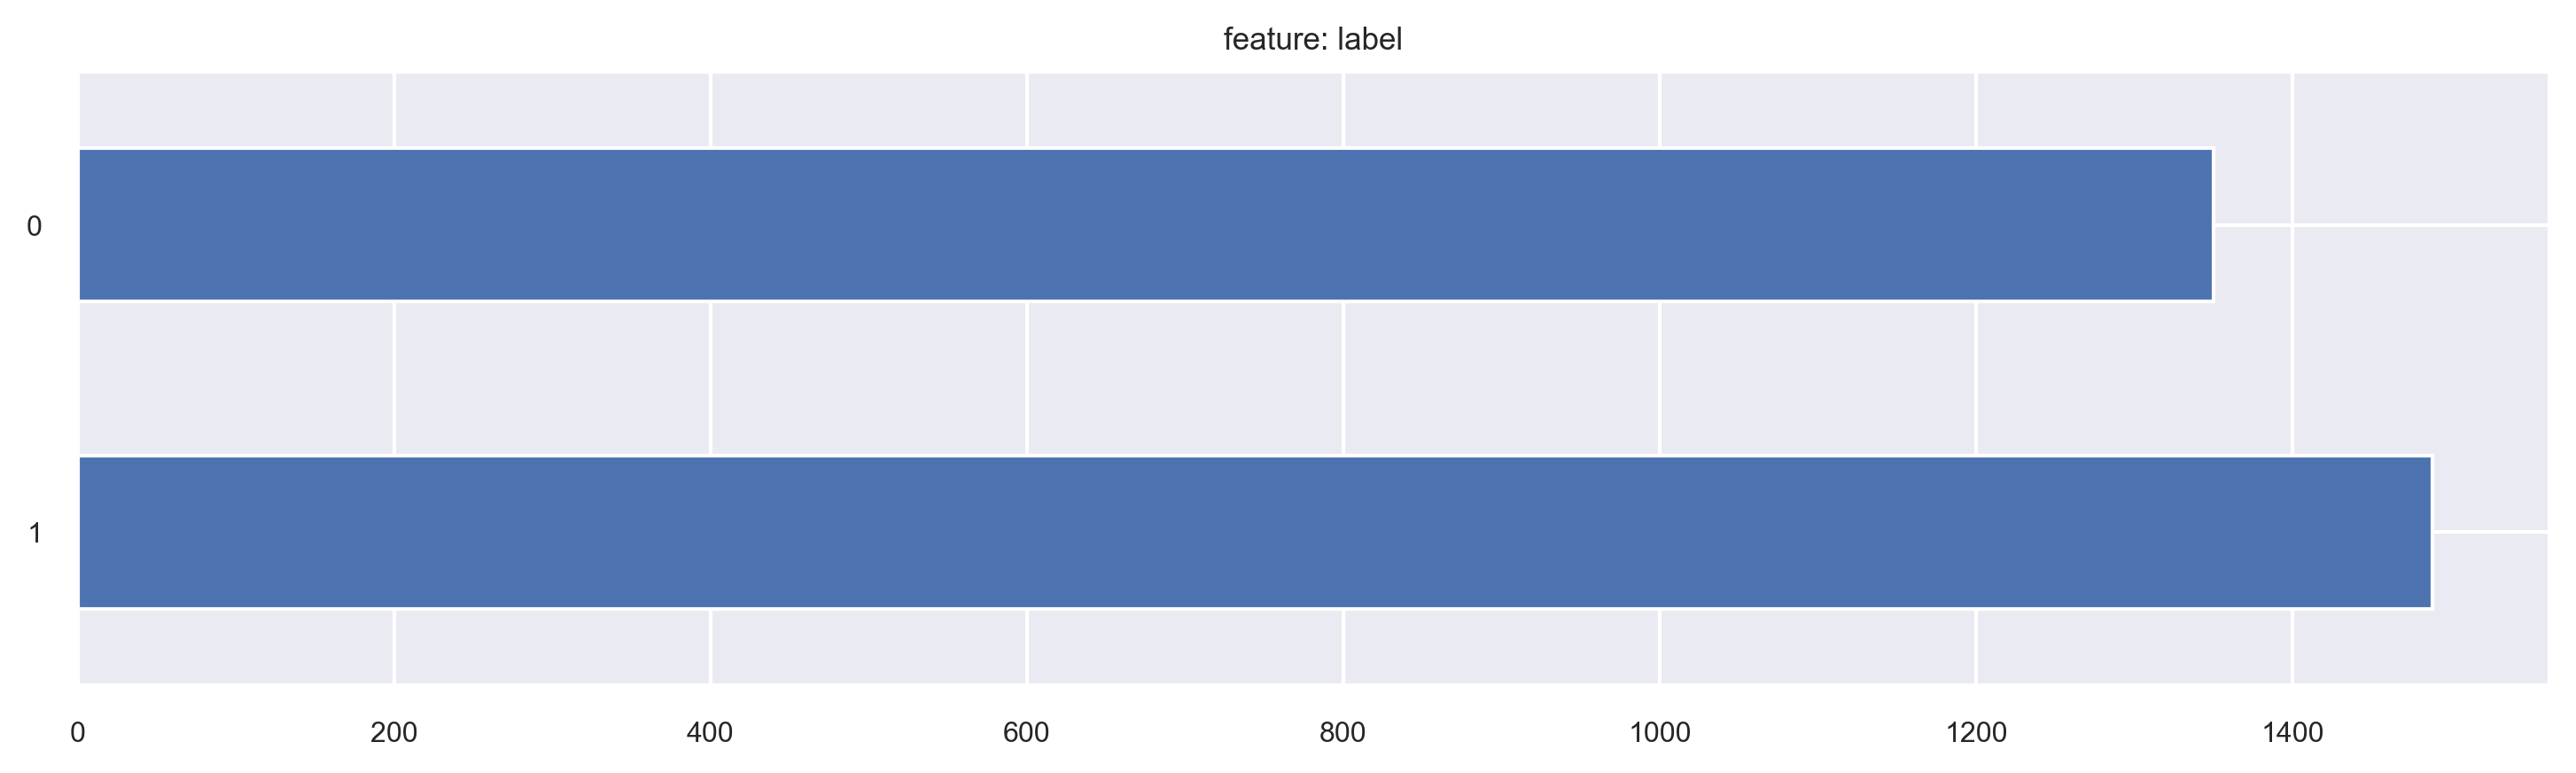

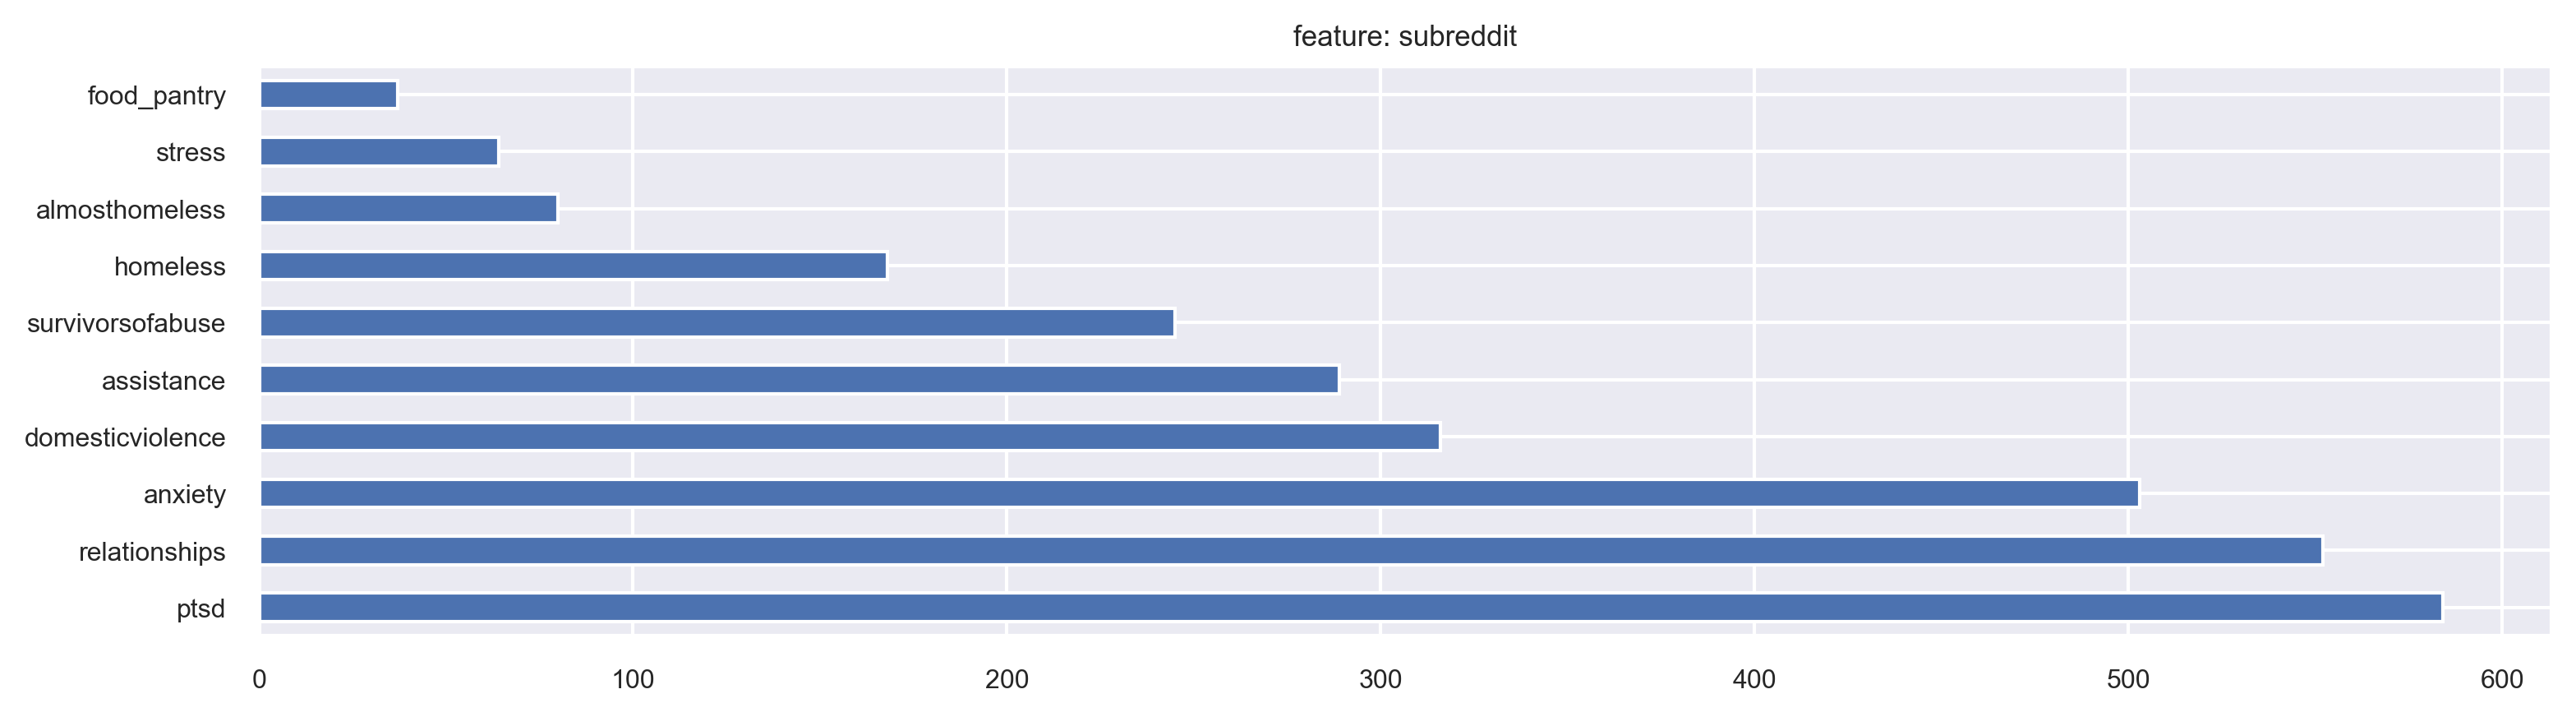

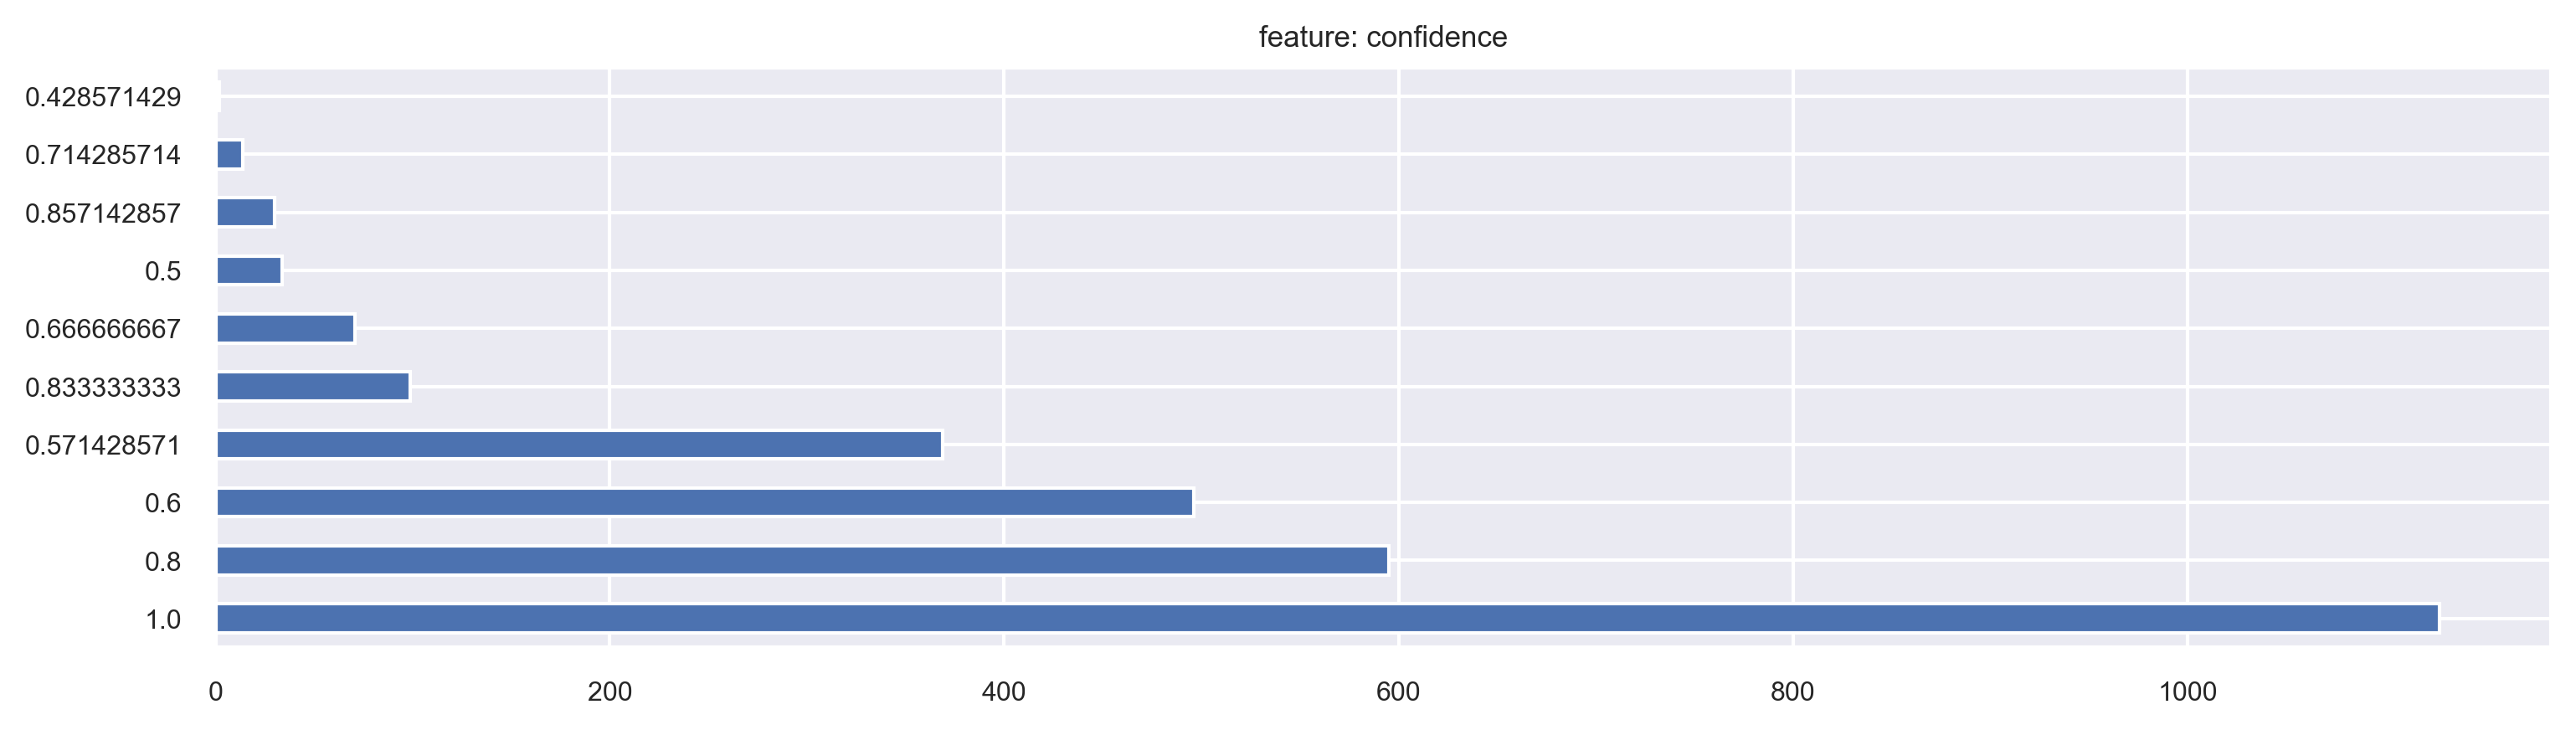

In [80]:
# let's plot a by column value counts

for col in df.columns:

    if df[col].nunique() <= 25:
        
        plt.figure(figsize = (12,3))
        sns.set(font_scale = 0.7)

        df[col].value_counts().plot(kind = "barh")

        plt.title(f'feature: {col}')
        plt.show()

### ``what about subreddit topics over time?``

In [81]:
# let's first look at the time span 
# viewing latest date first

df.index.max()

'2018-11-19 01:54:20'

In [82]:
# earliest date

df.index.min()

'2017-01-01 12:36:58'

In [83]:
# creating a month and year column 

df['month_year'] = pd.to_datetime(df.index).to_period('M')
df.head()

label post_id         subreddit sentence_range  \
social_timestamp                                                      
2018-03-21 06:39:13      1  8601tu              ptsd       (15, 20)   
2018-05-22 17:23:37      0  8lbrx9        assistance         (0, 5)   
2018-09-03 00:46:45      1  9ch1zh              ptsd       (15, 20)   
2018-01-20 06:25:55      1  7rorpp     relationships        [5, 10]   
2018-10-17 20:43:25      1  9p2gbc  survivorsofabuse         [0, 5]   

                                                                  text     id  \
social_timestamp                                                                
2018-03-21 06:39:13  He said he had not felt that way before, sugge...  33181   
2018-05-22 17:23:37  Hey there r/assistance, Not sure if this is th...   2606   
2018-09-03 00:46:45  My mom then hit me with the newspaper and it s...  38816   
2018-01-20 06:25:55  until i met my new boyfriend, he is amazing, h...    239   
2018-10-17 20:43:25  October is Domestic Violence Awareness Month a...   1421   

                     confidence  social_karma  syntax_ari  sentiment  \
social_timestamp                                                       
2018-03-21 06:39:13         0.8             5    1.806818  -0.002742   
2018-05-22 17:23:37         1.0             4    9.429737   0.292857   
2018-09-03 00:46:45         0.8             2    7.769821   0.011894   
2018-01-20 06:25:55         0.6             0    2.667798   0.141671   
2018-10-17 20:43:25         0.8            24    7.554238  -0.204167   

                     social_upvote_ratio  social_num_comments month_year  
social_timestamp                                                          
2018-03-21 06:39:13                 0.86                    1    2018-03  
2018-05-22 17:23:37                 0.65                    2    2018-05  
2018-09-03 00:46:45                 0.67                    0    2018-09  
2018-01-20 06:25:55                 0.50                    5    2018-01  
2018-10-17 20:43:25                 1.00                    1    2018-10

In [84]:
# sort df by index timestamp

df = df.sort_index(ascending = True)
df.head()

label post_id         subreddit sentence_range  \
social_timestamp                                                      
2017-01-01 12:36:58      1  5lezhz  domesticviolence       [14, 19]   
2017-01-01 12:36:58      1  5lezhz  domesticviolence        (5, 10)   
2017-01-01 18:35:06      1  5lge1y           anxiety         (0, 5)   
2017-01-03 16:10:28      1  5lspep  survivorsofabuse        (5, 10)   
2017-01-03 22:13:10      1  5luwz3    almosthomeless       [10, 15]   

                                                                  text     id  \
social_timestamp                                                                
2017-01-01 12:36:58  He came after me a few times so I got away and...    313   
2017-01-01 12:36:58  We will get through this and I am determined, ...  31536   
2017-01-01 18:35:06  Currently in s constant state of anxiety with ...   7419   
2017-01-03 16:10:28  I was having a fucking panic attack.Once we pa...  18404   
2017-01-03 22:13:10  I am afraid that she will sell the house becau...   1804   

                     confidence  social_karma  syntax_ari  sentiment  \
social_timestamp                                                       
2017-01-01 12:36:58    0.571429             4    0.531035   0.076333   
2017-01-01 12:36:58    0.857143             4    8.679730   0.047222   
2017-01-01 18:35:06    1.000000            14    7.822923  -0.083333   
2017-01-03 16:10:28    1.000000             5    0.633660  -0.466667   
2017-01-03 22:13:10    0.800000             5    2.823077  -0.401250   

                     social_upvote_ratio  social_num_comments month_year  
social_timestamp                                                          
2017-01-01 12:36:58                 0.84                    3    2017-01  
2017-01-01 12:36:58                 0.84                    3    2017-01  
2017-01-01 18:35:06                 0.94                    8    2017-01  
2017-01-03 16:10:28                 0.86                    7    2017-01  
2017-01-03 22:13:10                 0.65                   15    2017-01

In [85]:
# renaming several subreddit titles for clarification

df["subreddit"].replace({
    'almosthomeless': "almost_homeless",
    'domesticviolence': "domestic_violence",
    'survivorsofabuse': 'abuse_survivors'},
    inplace = True)

df["subreddit"].unique()

array(['domestic_violence', 'anxiety', 'abuse_survivors',
       'almost_homeless', 'homeless', 'ptsd', 'stress', 'assistance',
       'food_pantry', 'relationships'], dtype=object)

In [86]:
# plotting subreddit topics over time

test_df = pd.get_dummies(df["subreddit"])
test_df.index = pd.to_datetime(test_df.index)
test_df.head()

abuse_survivors  almost_homeless  anxiety  assistance  \
social_timestamp                                                             
2017-01-01 12:36:58                0                0        0           0   
2017-01-01 12:36:58                0                0        0           0   
2017-01-01 18:35:06                0                0        1           0   
2017-01-03 16:10:28                1                0        0           0   
2017-01-03 22:13:10                0                1        0           0   

                     domestic_violence  food_pantry  homeless  ptsd  \
social_timestamp                                                      
2017-01-01 12:36:58                  1            0         0     0   
2017-01-01 12:36:58                  1            0         0     0   
2017-01-01 18:35:06                  0            0         0     0   
2017-01-03 16:10:28                  0            0         0     0   
2017-01-03 22:13:10                  0            0         0     0   

                     relationships  stress  
social_timestamp                            
2017-01-01 12:36:58              0       0  
2017-01-01 12:36:58              0       0  
2017-01-01 18:35:06              0       0  
2017-01-03 16:10:28              0       0  
2017-01-03 22:13:10              0       0

In [87]:
# create a list of subreddit column/feature names

test_cols = test_df.columns.tolist()
test_cols

['abuse_survivors',
 'almost_homeless',
 'anxiety',
 'assistance',
 'domestic_violence',
 'food_pantry',
 'homeless',
 'ptsd',
 'relationships',
 'stress']

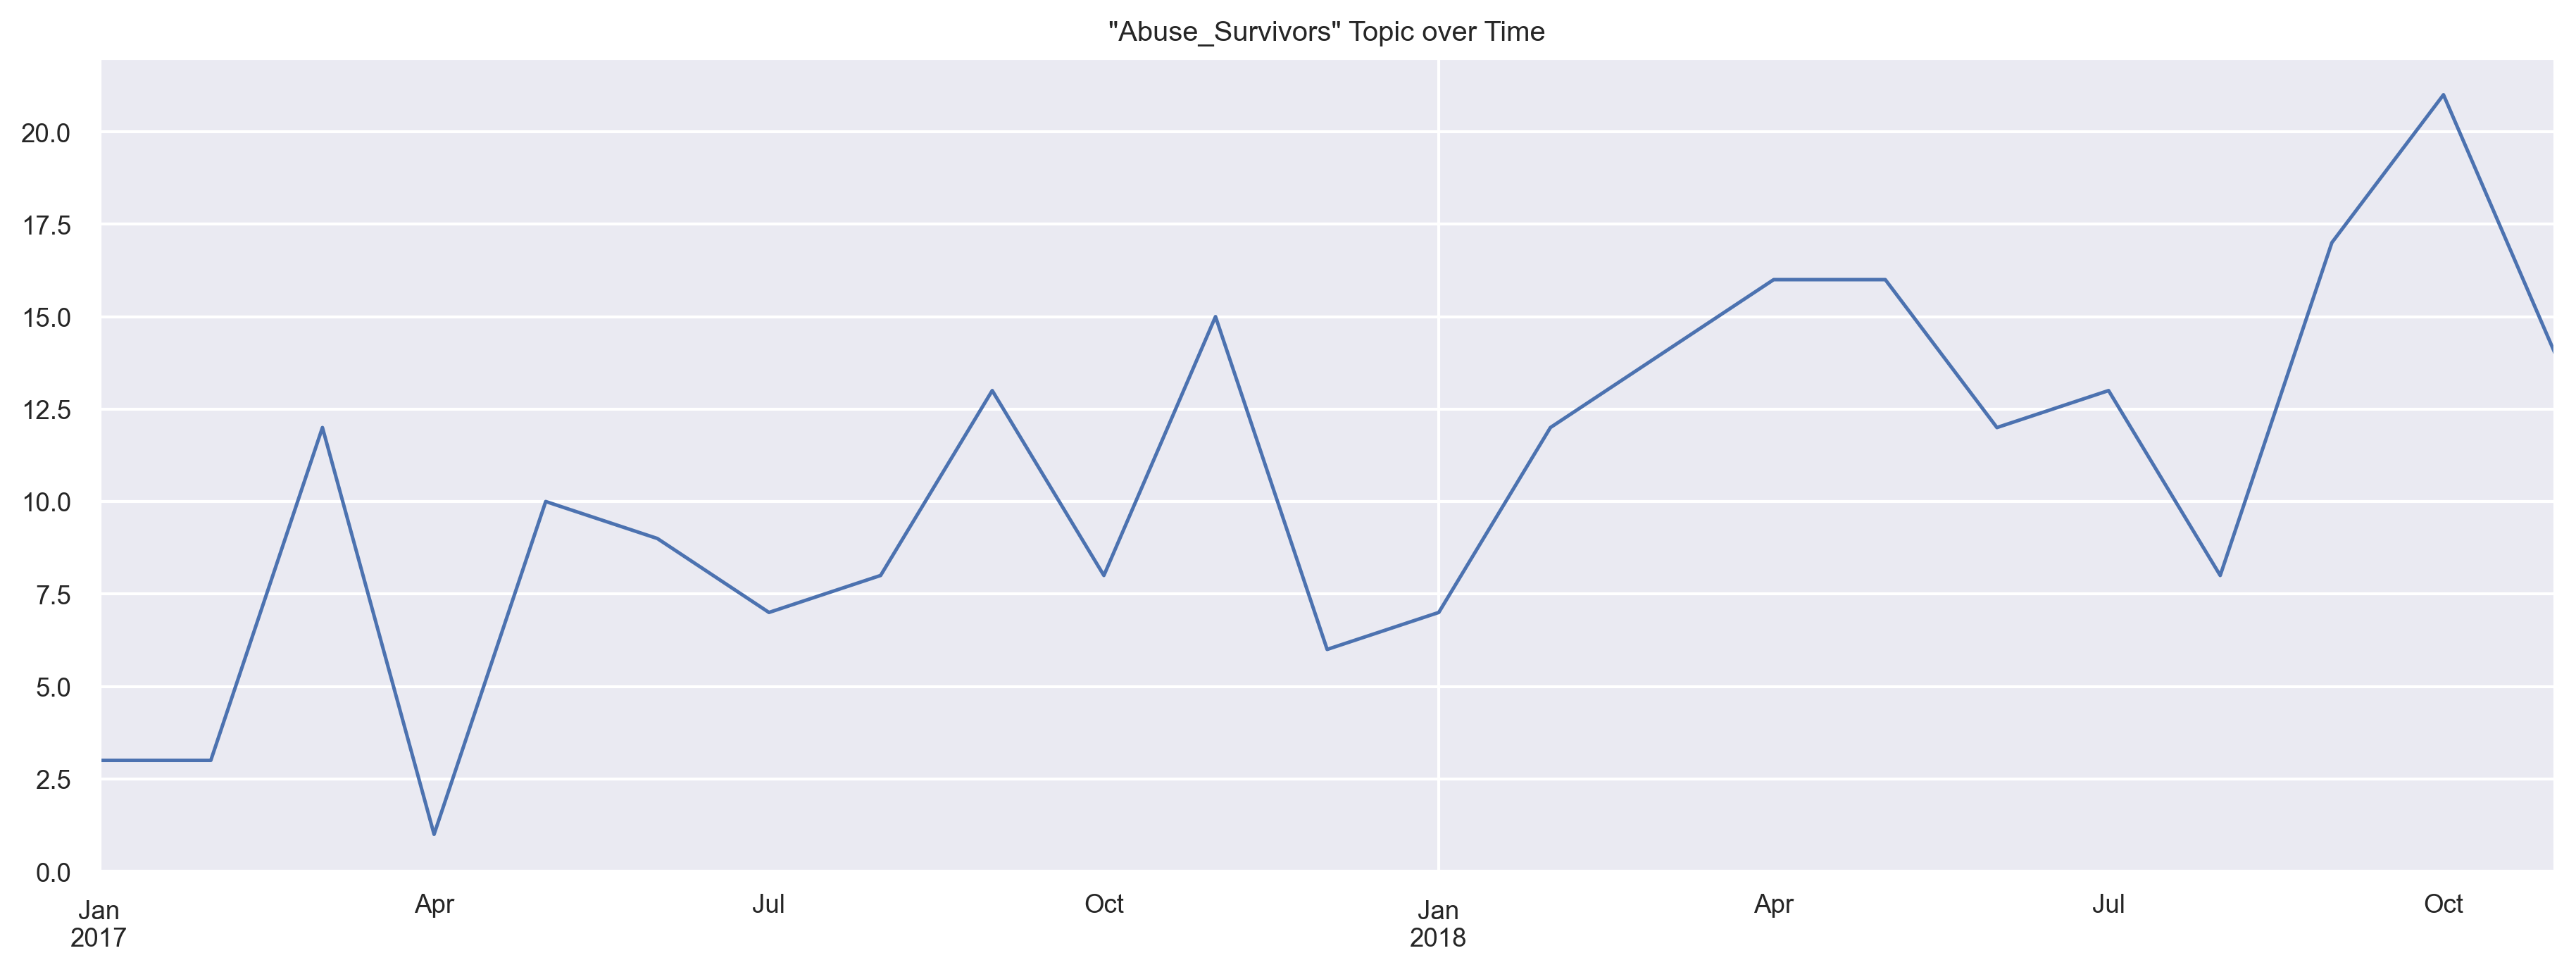

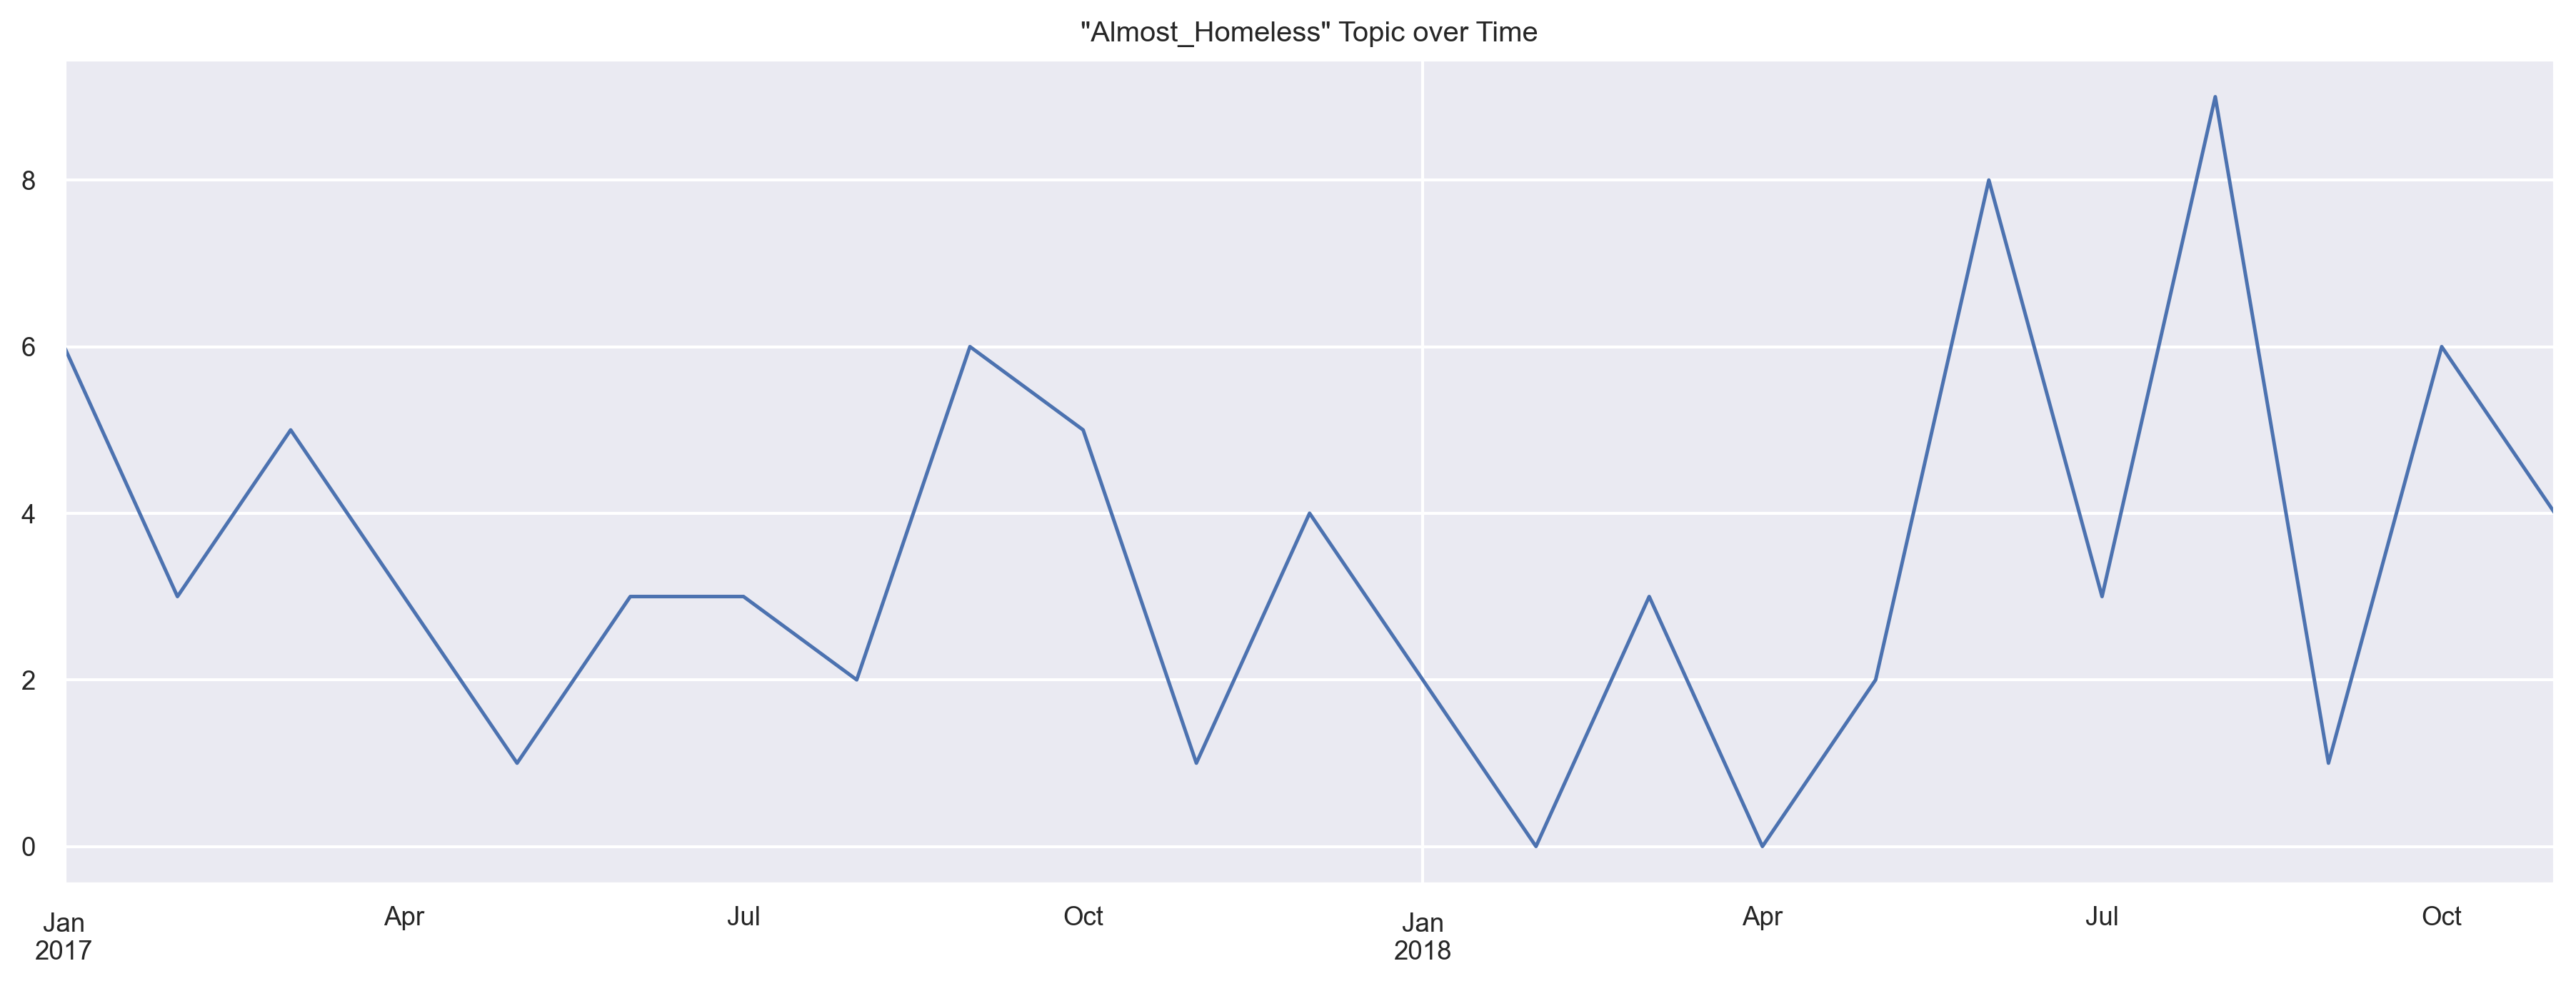

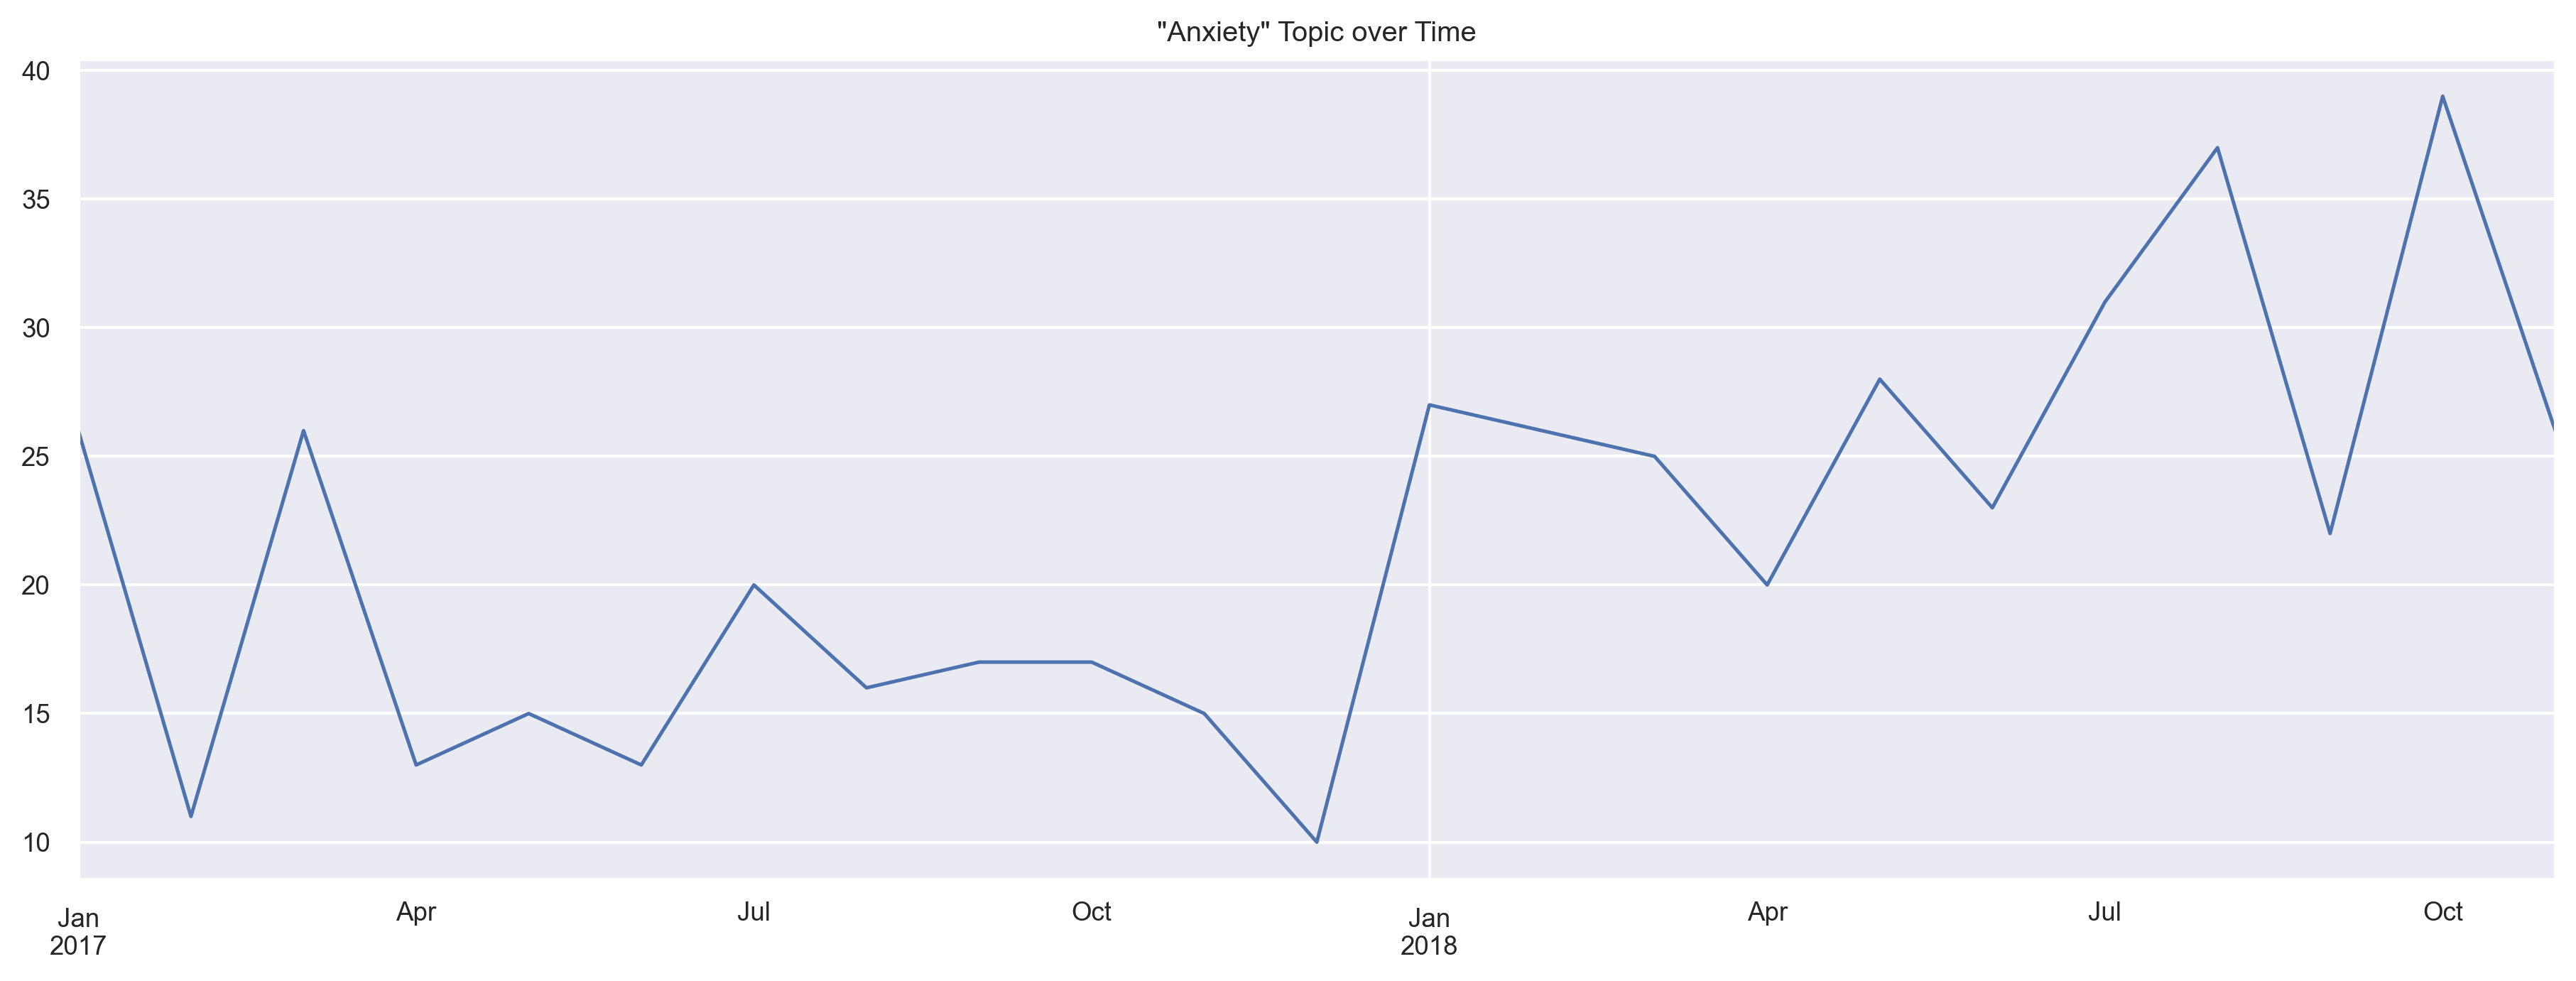

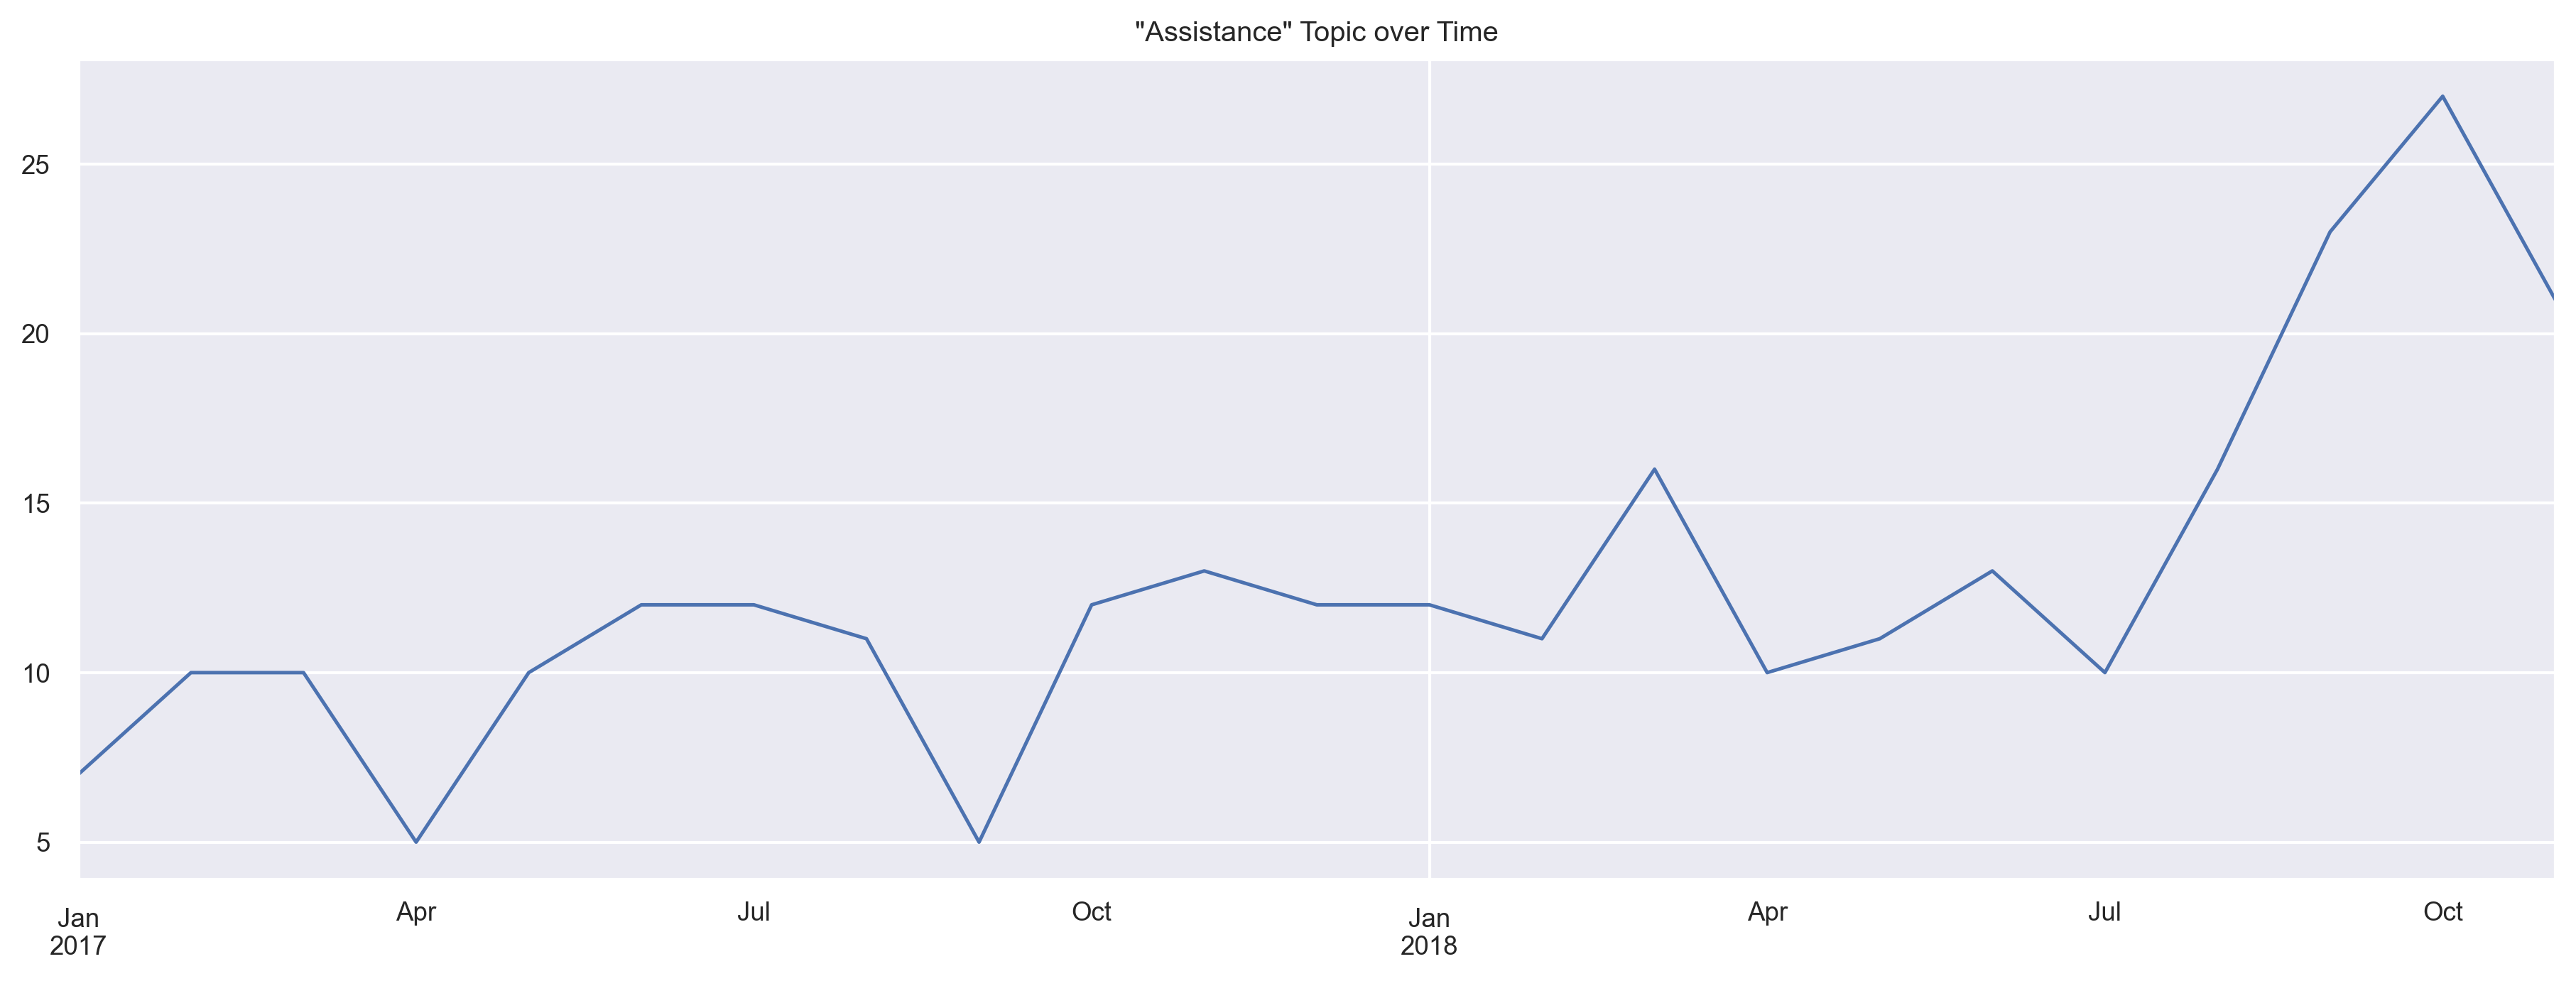

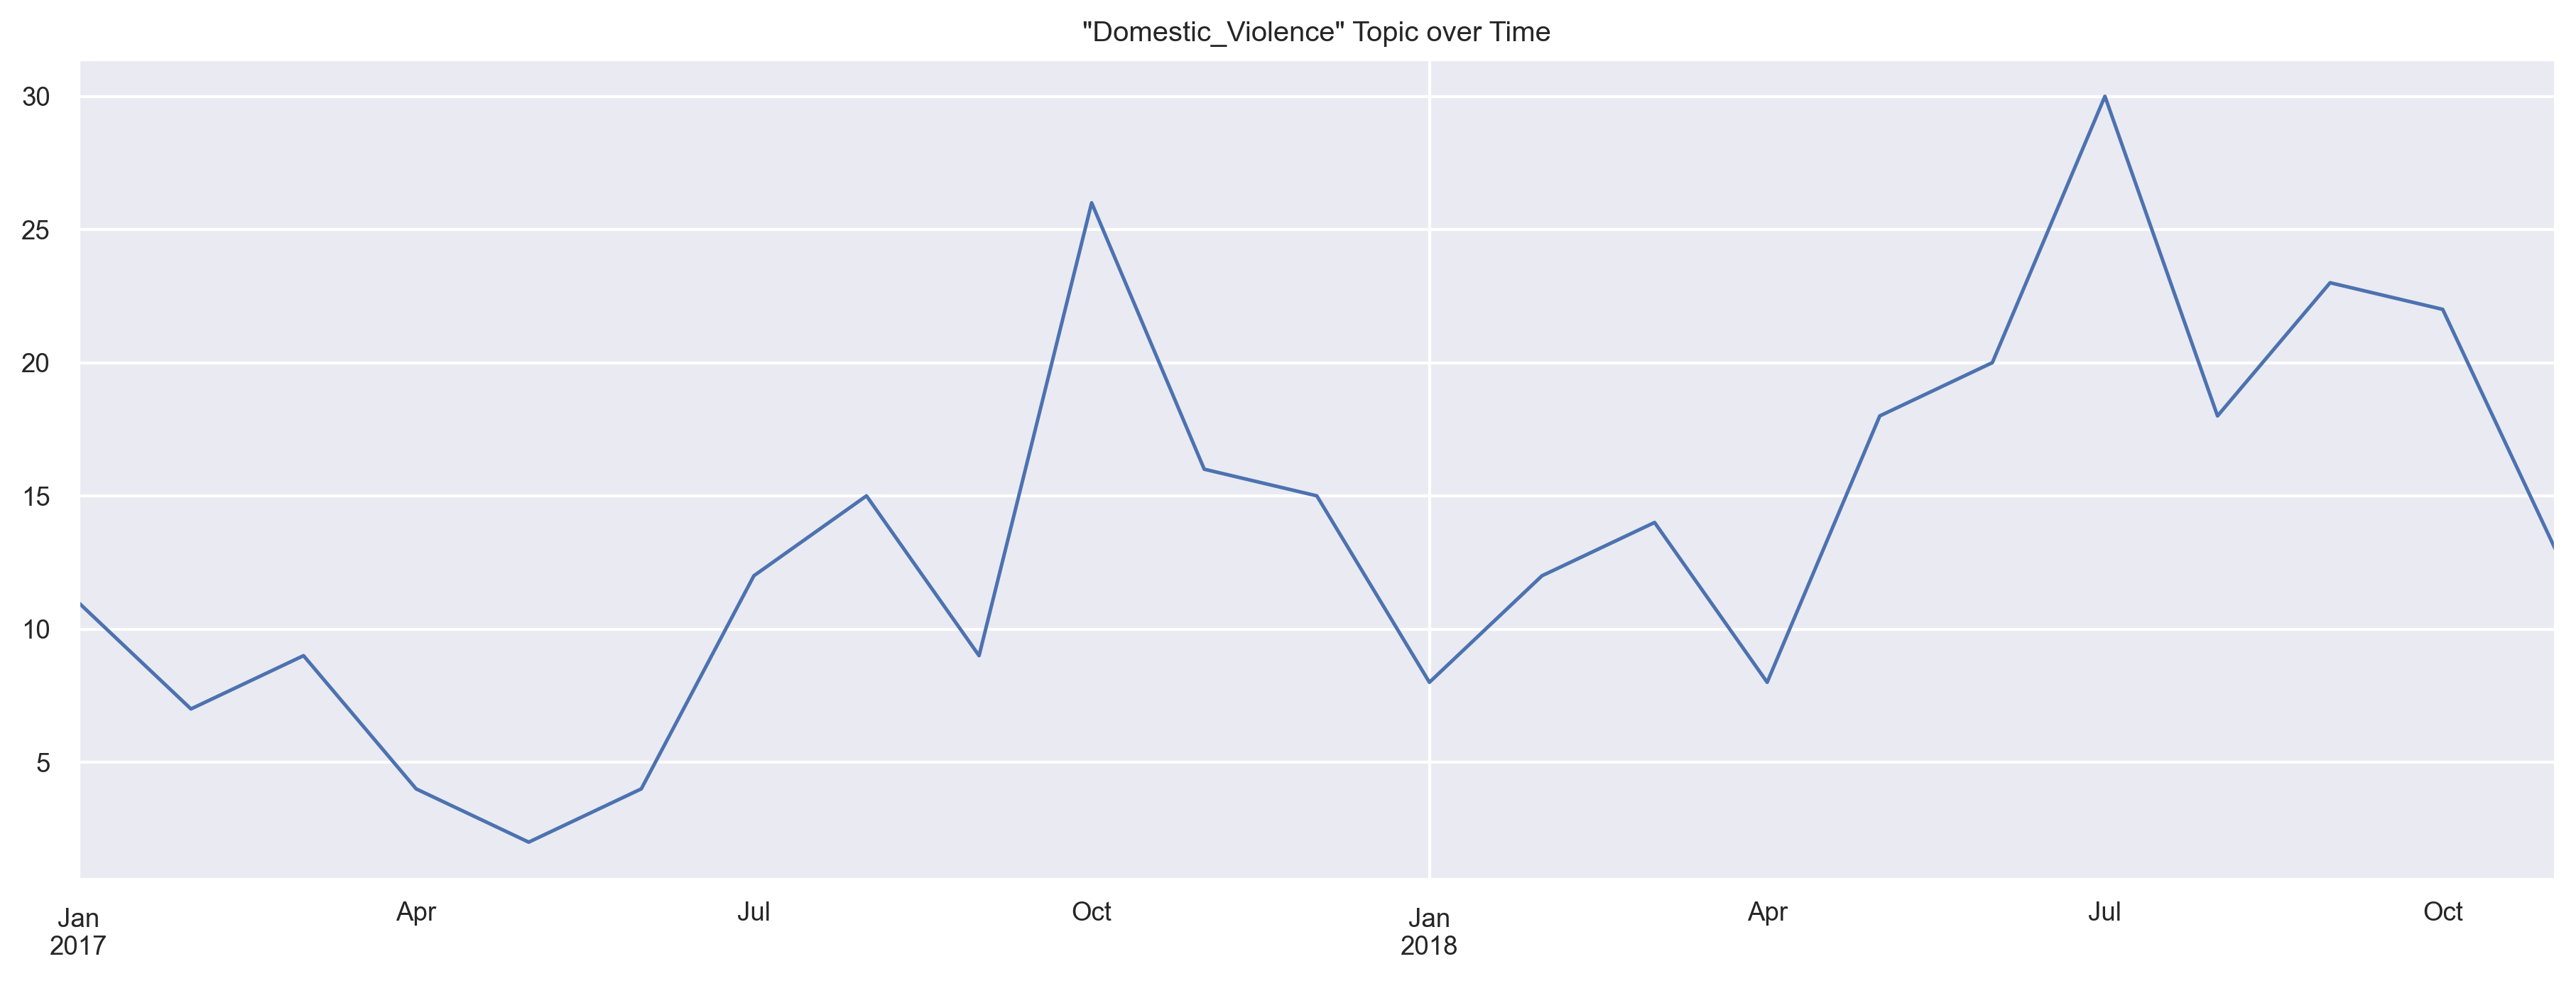

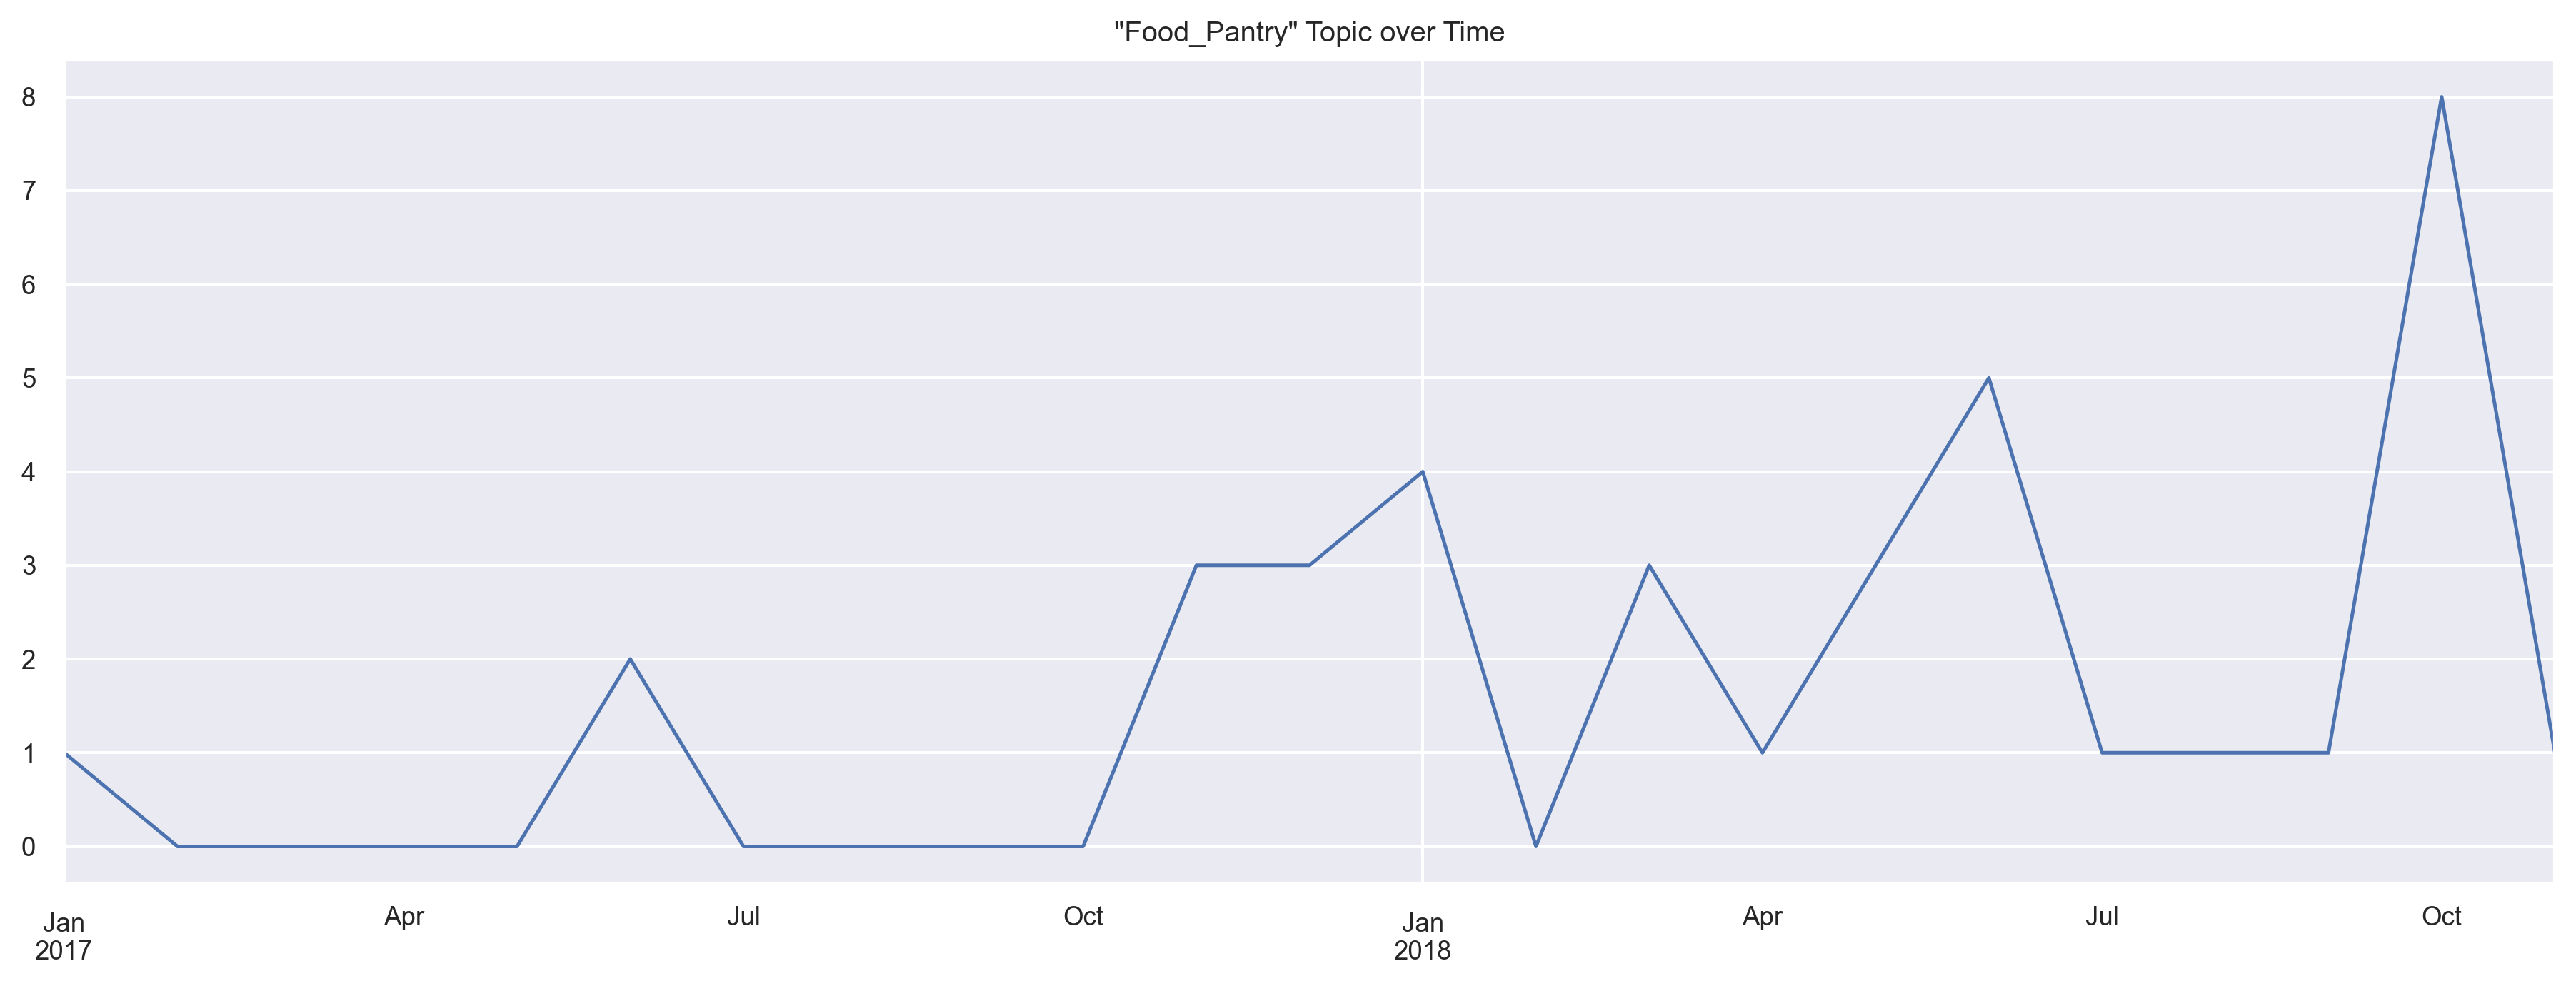

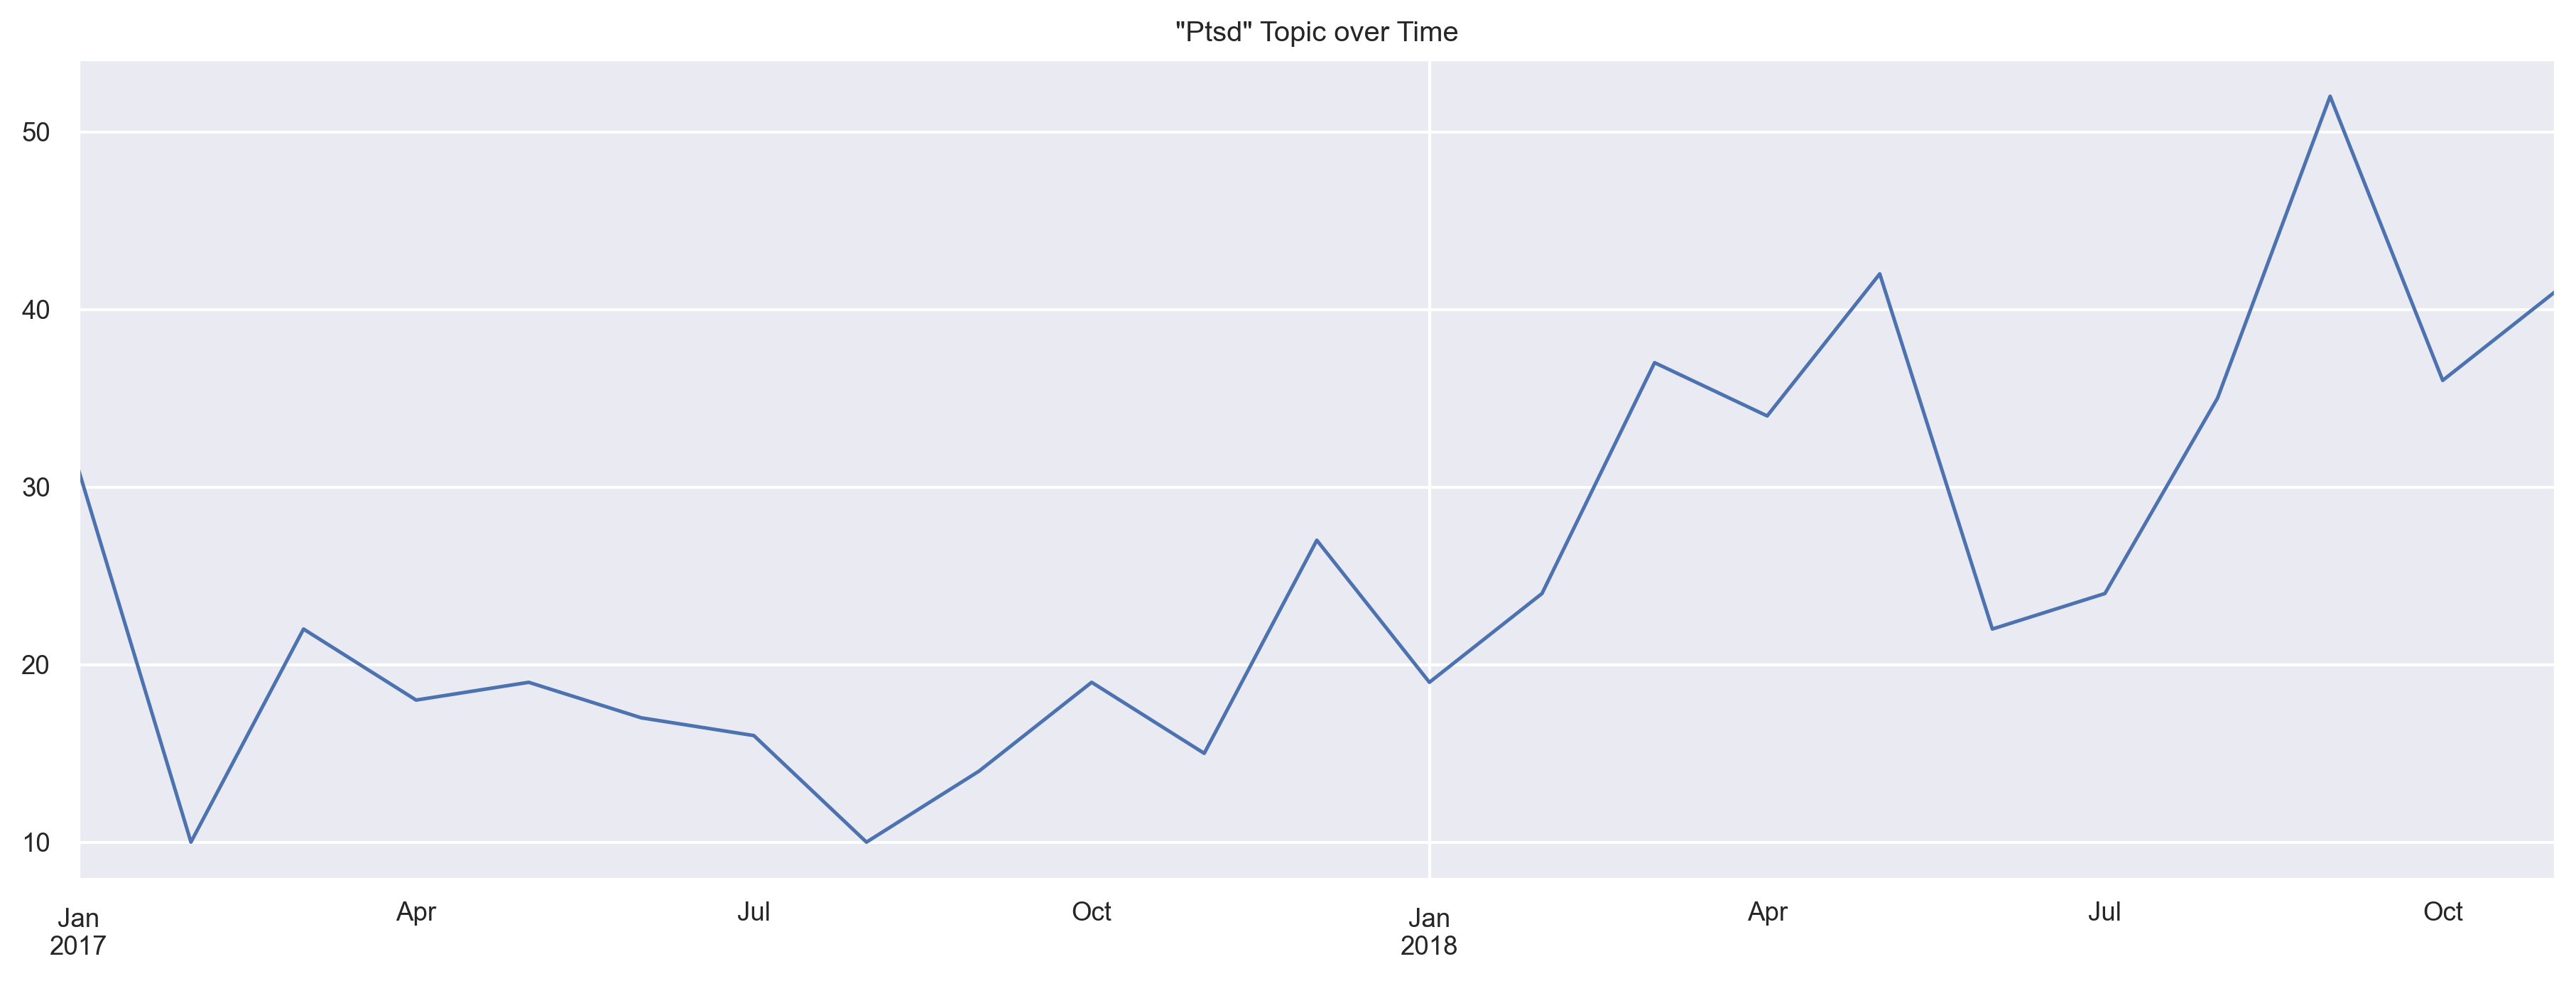

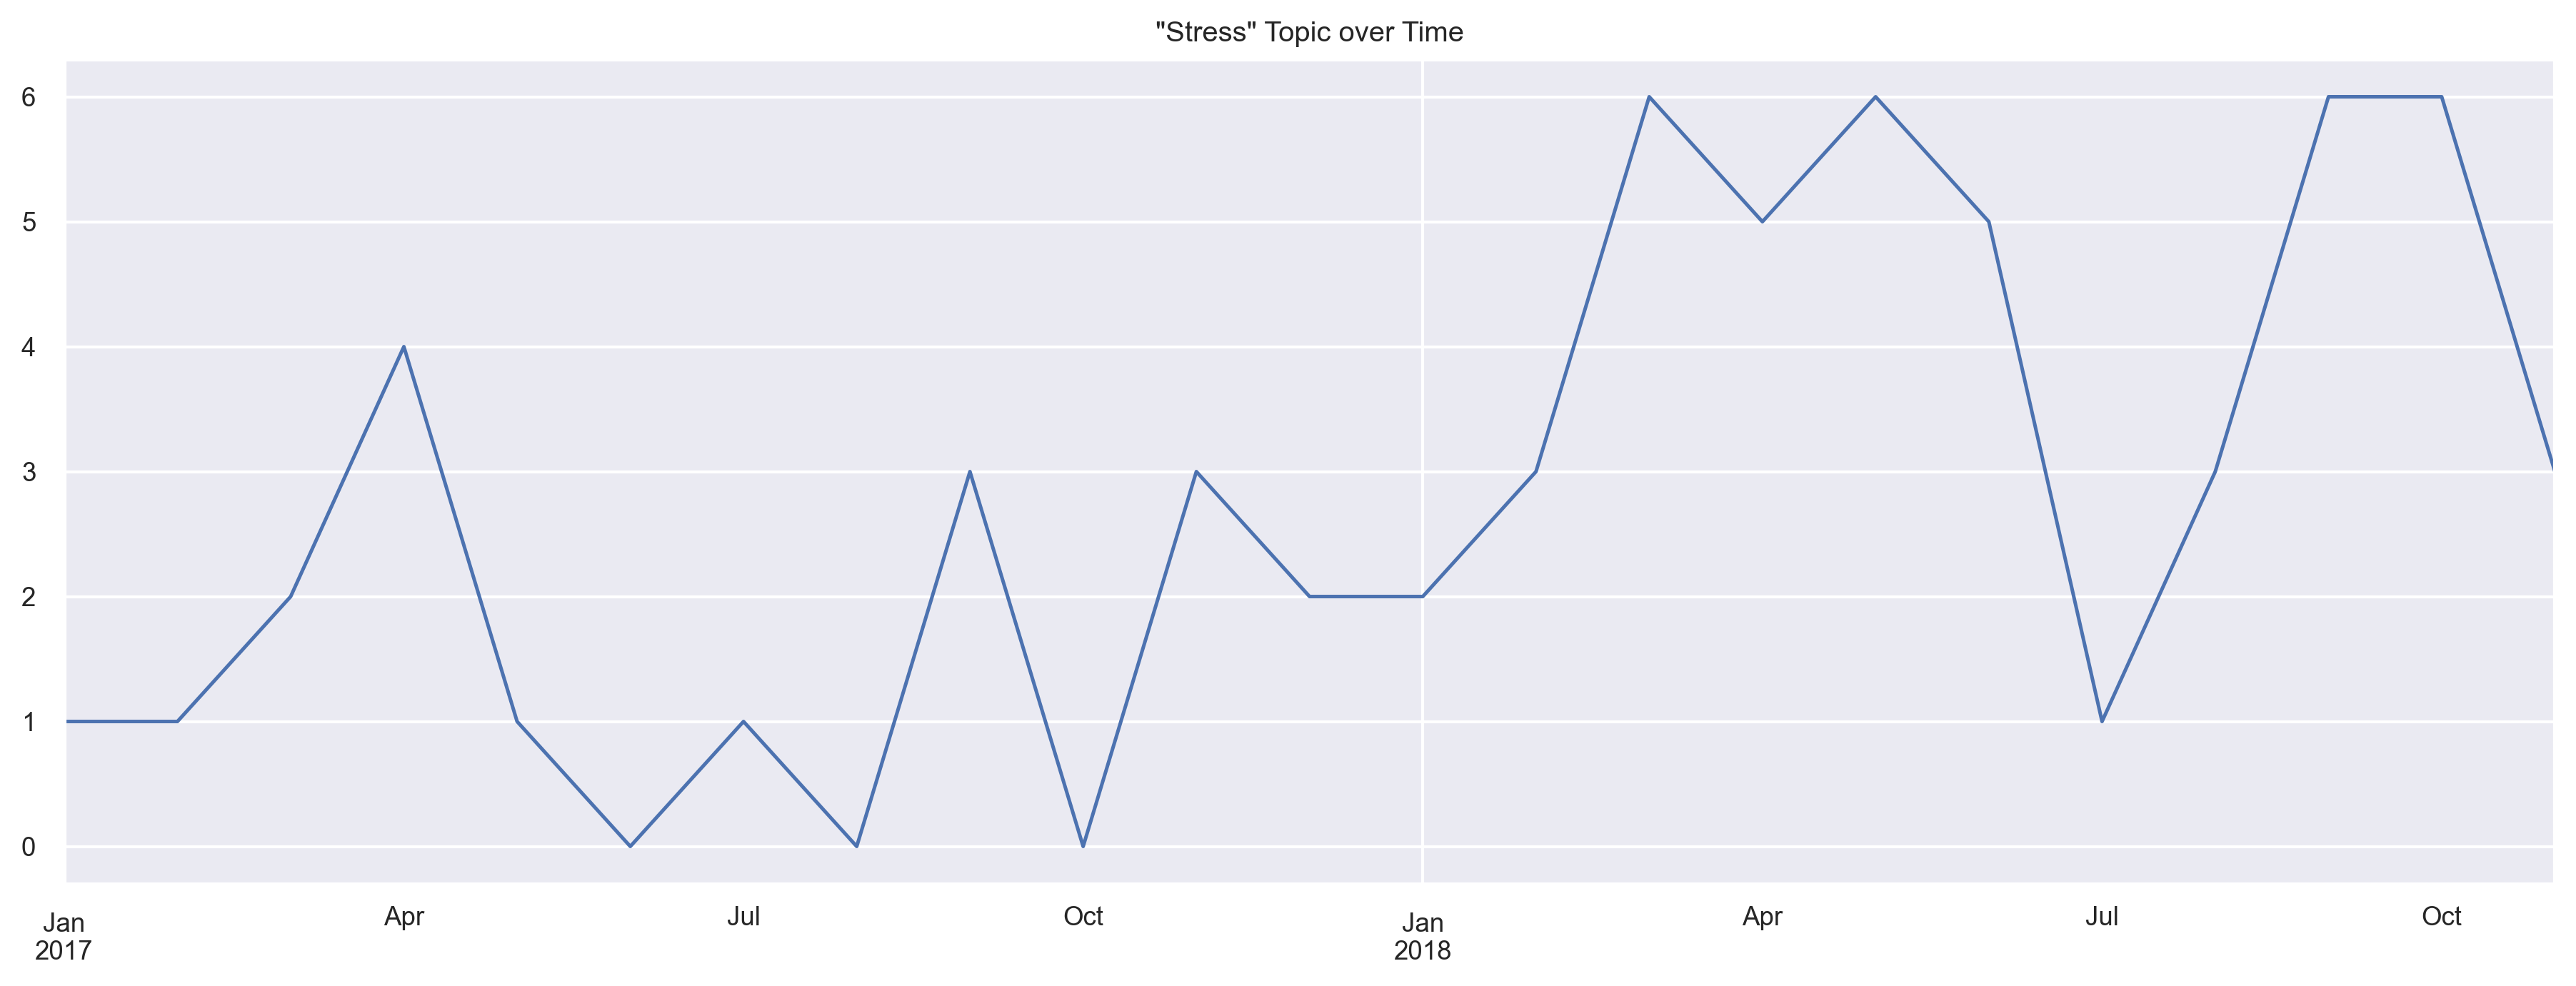

In [88]:
# let's plot the distinct total number of subreddit topics over time

for col in test_cols:
    
    plt.figure(figsize = (15, 5))
    plt.style.use('ggplot')
    sns.set(font_scale = 0.8)

    test_df[col].resample("M").sum().plot(kind = "line", linewidth = 1.2)
    plt.xlabel(None)

    plt.title(f'"{col.title()}" Topic over Time')
    plt.show()

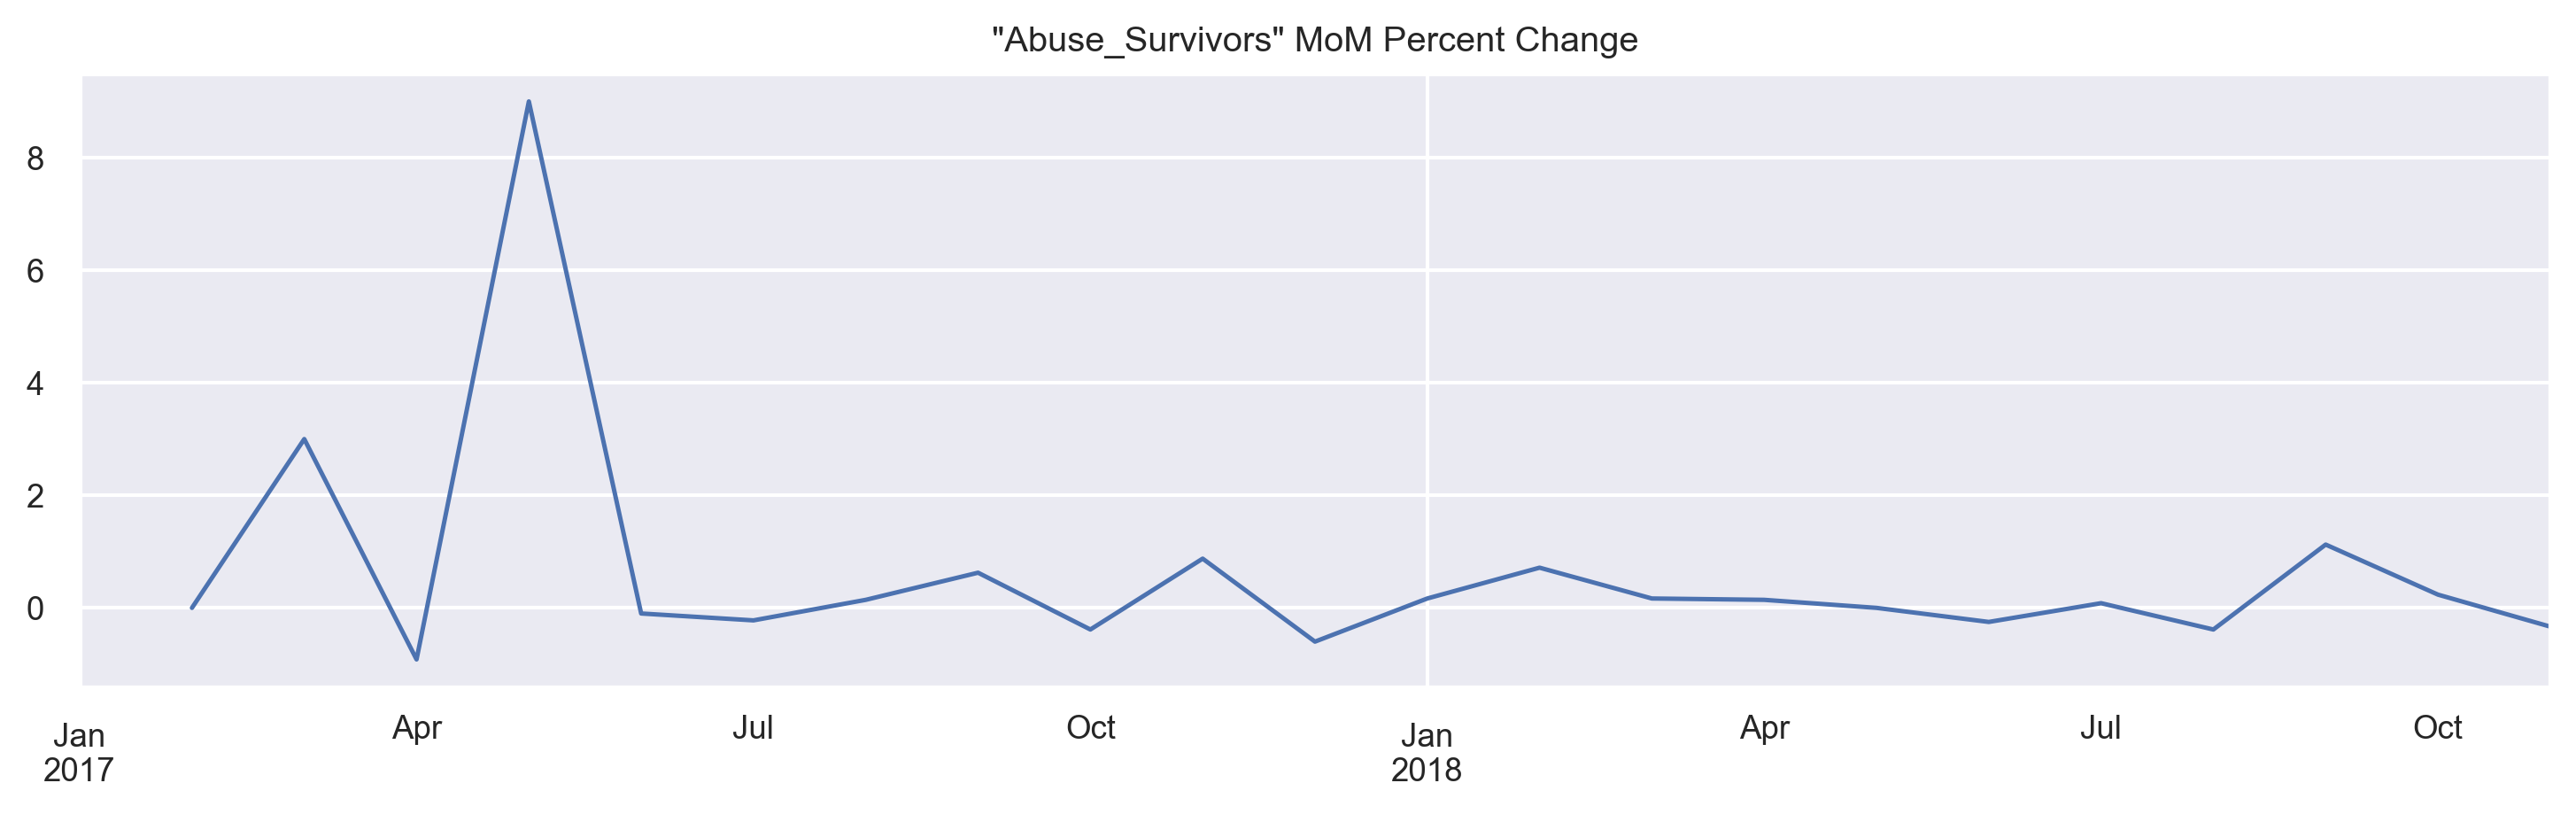

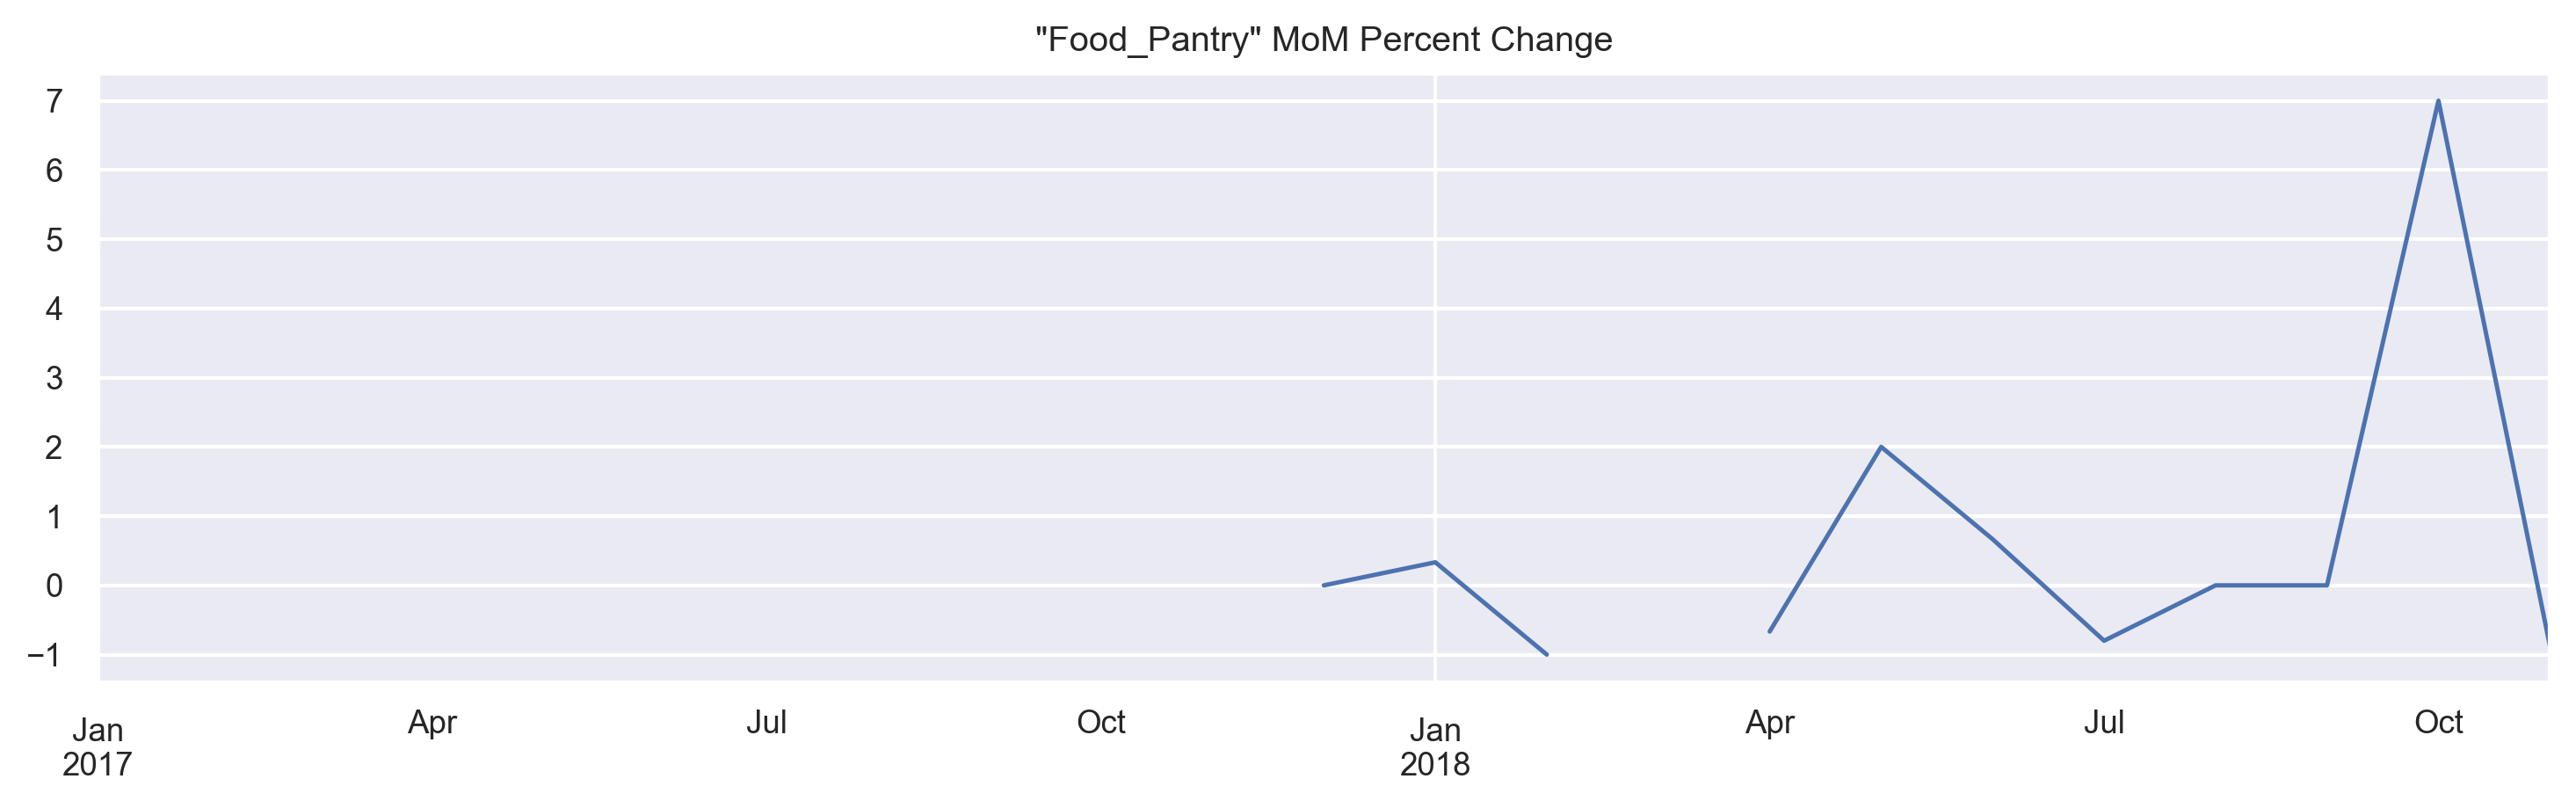

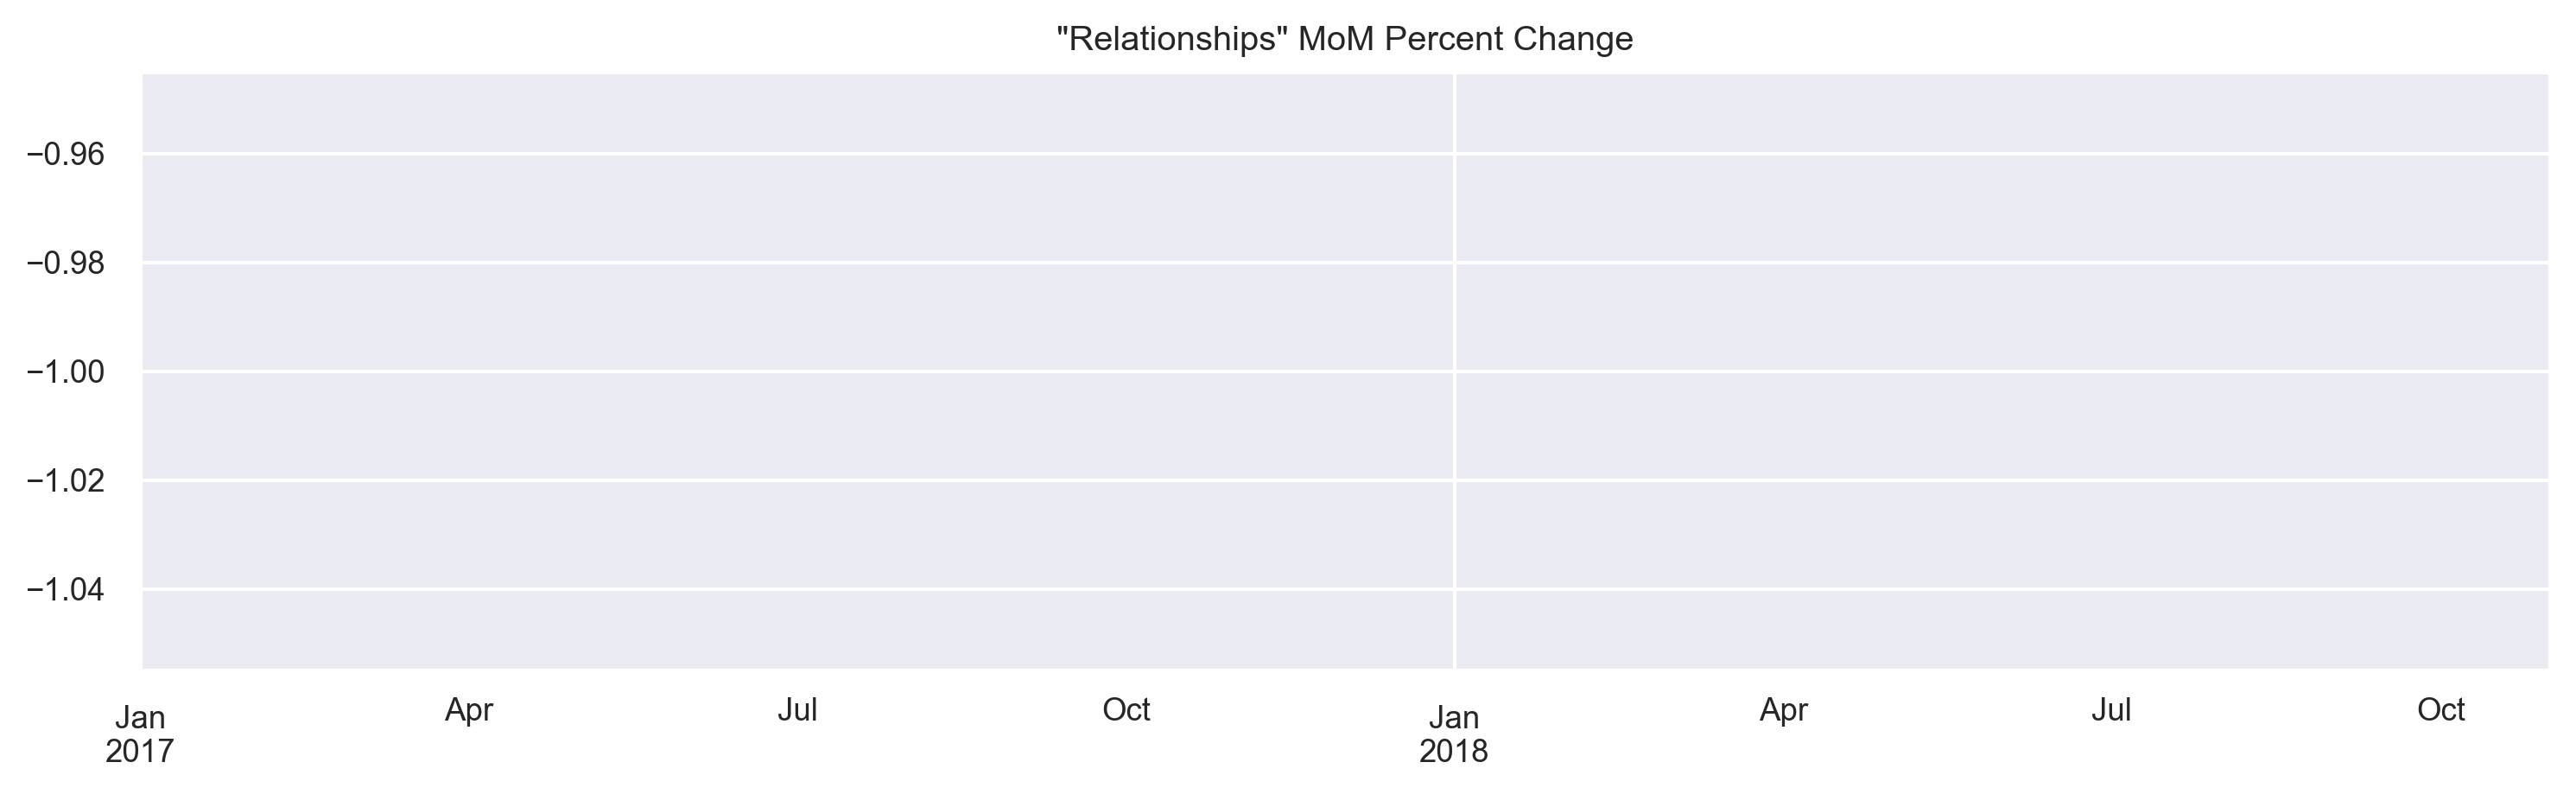

In [89]:
# i want to see the relative percent change difference from the previous month
# where JAN 2017 should reflect 0% because no change

def percent_change(x):

    if len(x):
        
        return (x[-1]-x[0])/x[0]

for col in test_cols:

    plt.figure(figsize = (12, 3))
    plt.style.use('ggplot')
    sns.set(font_scale = 0.8)

    # calculating subreddit count and month-over-month percentage change
    test_df[col].resample("M").sum().pct_change().plot(kind = "line", linewidth = 1.2)
    plt.xlabel(None)

    plt.title(f'"{col.title()}" MoM Percent Change')
    plt.show()

### ``observations/insights:``

- no trend line or breaks in plotted 'MoM percent change' represents no change from the prior month
- certain topics have relative "significant" MoM percentage changes
- it appears that there are no "distinguishable" trends accross the subreddit topics and when they are discussed/referenced throughout the studied period
- one additional step that we could consider taking is studying potential "anomalous" trends in the studied period and what real-world events may have taken place during these periods


``Since the 'subreddit' topics/labels are typically found within the context of the text -- I will forgo the idea of attempting to predict these classifications and solely focus on predicting 'stress'``

-----

In [90]:
# let's clean and glance at the text data

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2838 entries, 2017-01-01 12:36:58 to 2018-11-19 01:54:20
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype    
---  ------               --------------  -----    
 0   label                2838 non-null   int64    
 1   post_id              2838 non-null   object   
 2   subreddit            2838 non-null   object   
 3   sentence_range       2838 non-null   object   
 4   text                 2838 non-null   object   
 5   id                   2838 non-null   int64    
 6   confidence           2838 non-null   float64  
 7   social_karma         2838 non-null   int64    
 8   syntax_ari           2838 non-null   float64  
 9   sentiment            2838 non-null   float64  
 10  social_upvote_ratio  2838 non-null   float64  
 11  social_num_comments  2838 non-null   int64    
 12  month_year           2838 non-null   period[M]
dtypes: float64(4), int64(4), object(4), period[M](1)
memory usage: 310.4+ KB


In [91]:
# check the head first

df.head(2)

label post_id          subreddit sentence_range  \
social_timestamp                                                       
2017-01-01 12:36:58      1  5lezhz  domestic_violence       [14, 19]   
2017-01-01 12:36:58      1  5lezhz  domestic_violence        (5, 10)   

                                                                  text     id  \
social_timestamp                                                                
2017-01-01 12:36:58  He came after me a few times so I got away and...    313   
2017-01-01 12:36:58  We will get through this and I am determined, ...  31536   

                     confidence  social_karma  syntax_ari  sentiment  \
social_timestamp                                                       
2017-01-01 12:36:58    0.571429             4    0.531035   0.076333   
2017-01-01 12:36:58    0.857143             4    8.679730   0.047222   

                     social_upvote_ratio  social_num_comments month_year  
social_timestamp                                                          
2017-01-01 12:36:58                 0.84                    3    2017-01  
2017-01-01 12:36:58                 0.84                    3    2017-01

In [92]:
# cleaning the 'text' column data
# consider if it's necessary to remove words <= 2; as there are pronouns that might have 'stress' related implications (e.g., he, we, etc.)

df["text"] = df["text"].apply(mass_text_clean)
df.head() # check out!

label post_id          subreddit sentence_range  \
social_timestamp                                                       
2017-01-01 12:36:58      1  5lezhz  domestic_violence       [14, 19]   
2017-01-01 12:36:58      1  5lezhz  domestic_violence        (5, 10)   
2017-01-01 18:35:06      1  5lge1y            anxiety         (0, 5)   
2017-01-03 16:10:28      1  5lspep    abuse_survivors        (5, 10)   
2017-01-03 22:13:10      1  5luwz3    almost_homeless       [10, 15]   

                                                                  text     id  \
social_timestamp                                                                
2017-01-01 12:36:58  came time got away called cop wa arrested rest...    313   
2017-01-01 12:36:58  get determined even mean going shelter get aff...  31536   
2017-01-01 18:35:06  currently constant state heart palptations wok...   7419   
2017-01-03 16:10:28  wa fucking panic attack payed done went thrift...  18404   
2017-01-03 22:13:10  afraid sell house sure future hold family made...   1804   

                     confidence  social_karma  syntax_ari  sentiment  \
social_timestamp                                                       
2017-01-01 12:36:58    0.571429             4    0.531035   0.076333   
2017-01-01 12:36:58    0.857143             4    8.679730   0.047222   
2017-01-01 18:35:06    1.000000            14    7.822923  -0.083333   
2017-01-03 16:10:28    1.000000             5    0.633660  -0.466667   
2017-01-03 22:13:10    0.800000             5    2.823077  -0.401250   

                     social_upvote_ratio  social_num_comments month_year  
social_timestamp                                                          
2017-01-01 12:36:58                 0.84                    3    2017-01  
2017-01-01 12:36:58                 0.84                    3    2017-01  
2017-01-01 18:35:06                 0.94                    8    2017-01  
2017-01-03 16:10:28                 0.86                    7    2017-01  
2017-01-03 22:13:10                 0.65                   15    2017-01

In [93]:
# let's solely focus on text and the target output == "label"

df = df[[ 
    "label",
    "subreddit",
    "text"
        ]].reset_index(drop = True)

df.head()

label          subreddit                                               text
0      1  domestic_violence  came time got away called cop wa arrested rest...
1      1  domestic_violence  get determined even mean going shelter get aff...
2      1            anxiety  currently constant state heart palptations wok...
3      1    abuse_survivors  wa fucking panic attack payed done went thrift...
4      1    almost_homeless  afraid sell house sure future hold family made...

In [94]:
# what's the target variable proportion/breakdown

plt.figure(figsize = (8,4))
sns.set(font_scale = 0.7)

ax = sns.countplot( 
    data = df,
    x = "label",
    order = df["label"].value_counts().index,
    palette = "crest"
)

plt.title("Target Variable: Stress Related Texts in Reddit Data")
plt.ylabel("Total Reddit Messages")
plt.xlabel("Stress Related Texts")
plt.show()

In [95]:
# let's view the target variable as a percentage of total

plt.figure(figsize = (8,4))
sns.set(font_scale = 0.7)

ax = sns.barplot( 
    data = df,
    y = df["label"].value_counts(normalize = True).values,
    x = df["label"].value_counts(normalize = True).index,
    order = df["label"].value_counts(normalize = True).index,
    palette = "crest"
)

ax.bar_label(ax.containers[0], fmt = '%.4f')
plt.title("Percentage of Stress Related Reddit Messages")
plt.ylabel("%")

plt.xlabel("Stress Related Texts")
plt.show()

In [96]:
# showing labels/target as count and percentage of total

prepare.show_counts_and_ratios(df, "label")

n   percent
1  1488  0.524313
0  1350  0.475687

----
### ``Splitting the Data``

In [97]:
# split the reddit "stress" dataset into train, validate, and test

train, validate, test = prepare.train_validate_test_split(df, "label")

train shape: (1589, 3)
validate shape: (681, 3)
test shape: (568, 3)


In [98]:
train.head()

label        subreddit  \
48        1          anxiety   
1648      1  abuse_survivors   
923       0    relationships   
1238      0    relationships   
2760      0             ptsd   

                                                   text  
48    suffered mild diagnosed 4 year logical rationa...  
1648  feel like cannot trust anyone truly feel never...  
923   thing enjoy see big deal seems perceive grand ...  
1238  talk morning life went next year would continu...  
2760  everyone edit title say reading symptom btw fe...

In [99]:
# viewing reddit text data by subreddit topics

train.subreddit.unique().tolist()

['anxiety',
 'abuse_survivors',
 'relationships',
 'ptsd',
 'almost_homeless',
 'domestic_violence',
 'food_pantry',
 'homeless',
 'assistance',
 'stress']

In [100]:
# splitting the text by subreddit

all_words = ' '.join(train.text).split()

almost_homeless_words = ' '.join(train.text[train["subreddit"] == 'almost_homeless']).split()

assistance_words = ' '.join(train.text[train["subreddit"] == 'assistance']).split()

anxiety_words = ' '.join(train.text[train["subreddit"] == 'anxiety']).split()

domestic_violence_words = ' '.join(train.text[train["subreddit"] == 'domestic_violence']).split()

food_pantry_words = ' '.join(train.text[train["subreddit"] == 'food_pantry']).split()

homeless_words = ' '.join(train.text[train["subreddit"] == 'homeless']).split()

ptsd_words = ' '.join(train.text[train["subreddit"] == 'ptsd']).split()

relationships_words = ' '.join(train.text[train["subreddit"] == 'relationships']).split()

stress_words = ' '.join(train.text[train["subreddit"] == 'stress']).split()

survivors_words = ' '.join(train.text[train["subreddit"] == 'abuse_survivors']).split()

In [101]:
# what about individual word counts?

all_freq = pd.Series(all_words).value_counts()

almost_homeless_freq = pd.Series(almost_homeless_words).value_counts()

assistance_freq = pd.Series(assistance_words).value_counts()

axiety_freq = pd.Series(anxiety_words).value_counts()

domestic_violence_freq = pd.Series(domestic_violence_words).value_counts()

food_pantry_freq = pd.Series(food_pantry_words).value_counts()

homeless_freq = pd.Series(homeless_words).value_counts()

ptsd_freq = pd.Series(ptsd_words).value_counts()

relationships_freq = pd.Series(relationships_words).value_counts()

stress_freq = pd.Series(stress_words).value_counts()

survivors_freq = pd.Series(survivors_words).value_counts()

In [102]:
# viewing total number of unique words by subreddit topic

subreddits = [
    'all_words',
    'almost_homeless_words',
    'assistance_words',
    'anxiety_words',
    'domestic_violence_words',
    'food_pantry_words',
    'homeless_words',
    'ptsd_words',
    'relationships_words',
    'stress_words',
    'survivors_words']

frames = [
    all_words,
    almost_homeless_words,
    assistance_words,
    anxiety_words,
    domestic_violence_words,
    food_pantry_words,
    homeless_words,
    ptsd_words,
    relationships_words,
    stress_words,
    survivors_words]

for i in range(len(subreddits)):
    
        print(subreddits[i] + ": " + str(len(frames[i])))
        print('--------------------------------')

all_words: 63275
--------------------------------
almost_homeless_words: 1923
--------------------------------
assistance_words: 6635
--------------------------------
anxiety_words: 10674
--------------------------------
domestic_violence_words: 6925
--------------------------------
food_pantry_words: 792
--------------------------------
homeless_words: 3577
--------------------------------
ptsd_words: 13299
--------------------------------
relationships_words: 12565
--------------------------------
stress_words: 1470
--------------------------------
survivors_words: 5415
--------------------------------


In [103]:
df.head()

label          subreddit                                               text
0      1  domestic_violence  came time got away called cop wa arrested rest...
1      1  domestic_violence  get determined even mean going shelter get aff...
2      1            anxiety  currently constant state heart palptations wok...
3      1    abuse_survivors  wa fucking panic attack payed done went thrift...
4      1    almost_homeless  afraid sell house sure future hold family made...

In [104]:
# visualize subreddit topics by total number of words
# place "all text" as benchmark plot
# done in two (2) step process 
# step 1: for ea. row, count the total number of individual words in "text" column -- create a new column called "word_count"
# step 2: use a "groupby" method on "subreddit" column/topic and add all figures in "word_count" column

In [105]:
# step 1: for ea. row, count the total number of individual words in "text" column -- 
# create a new column called "word_count"

df["word_count"] = df["text"].str.split().str.len()
df.head() # checks out!

label          subreddit  \
0      1  domestic_violence   
1      1  domestic_violence   
2      1            anxiety   
3      1    abuse_survivors   
4      1    almost_homeless   

                                                text  word_count  
0  came time got away called cop wa arrested rest...          44  
1  get determined even mean going shelter get aff...          50  
2  currently constant state heart palptations wok...          32  
3  wa fucking panic attack payed done went thrift...          29  
4  afraid sell house sure future hold family made...          42

In [106]:
# step 2: use a "groupby" method on "subreddit" column/topic and add all figures in "word_count" column

sum_of_words = df.groupby("subreddit")["word_count"].agg("sum").sort_values(ascending = False)
sum_of_words

subreddit
ptsd                 22196
relationships        21586
anxiety              19595
domestic_violence    12033
assistance           11411
abuse_survivors      10117
homeless              6852
almost_homeless       3168
stress                2849
food_pantry           1290
Name: word_count, dtype: int64

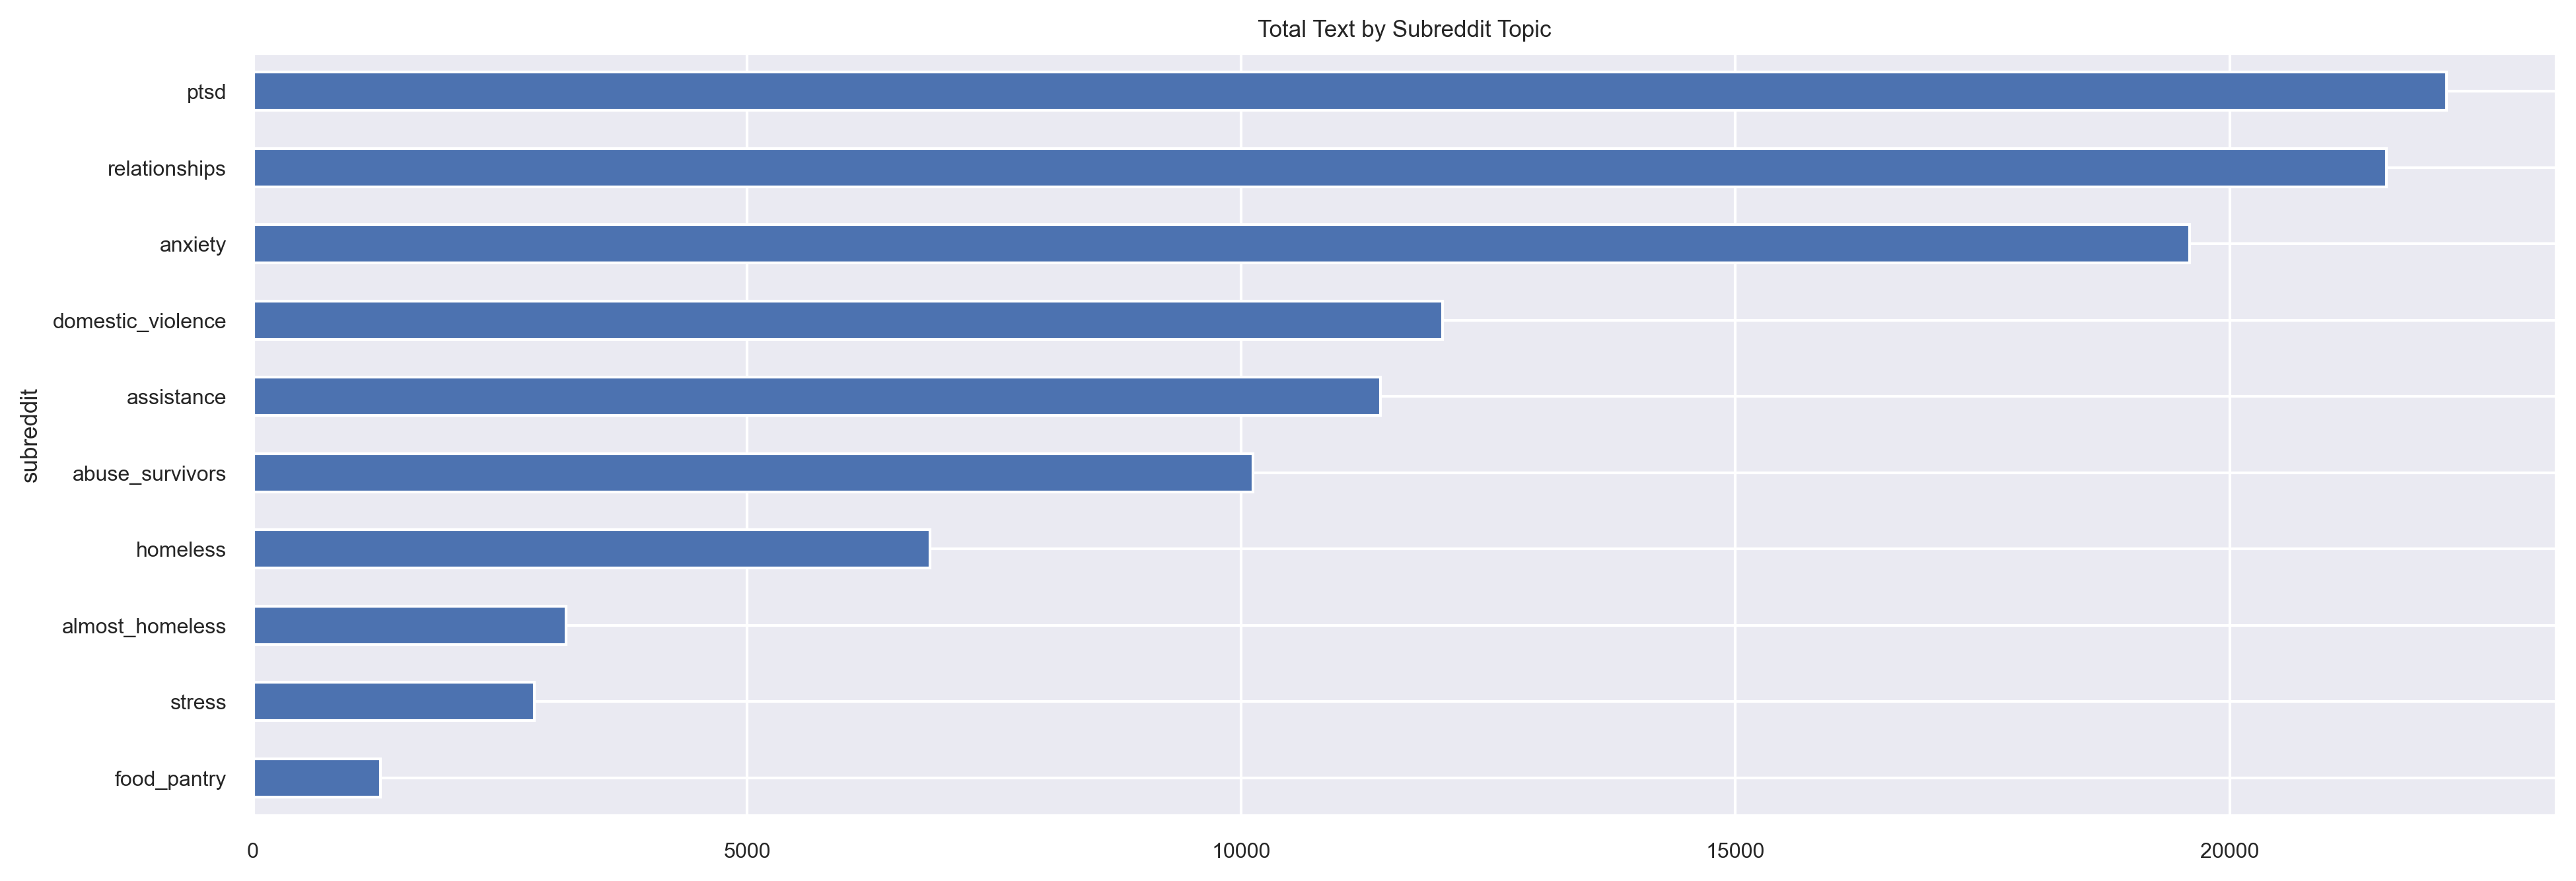

In [107]:
# visualizing total word count by subreddit topic
# let's also use the total text length as a benchmark/reference

plt.figure(figsize = (15, 5))
sum_of_words.sort_values(ascending = True).plot.barh()

plt.title("Total Text by Subreddit Topic")
plt.show()

In [108]:
'all_freq',
'almost_homeless_freq',
'assistance_freq',
'axiety_freq',
'domestic_violence_freq',
'food_pantry_freq',
'homeless_freq',
'ptsd_freq',
'relationships_freq',
'stress_freq',
'survivors_freq'

'survivors_freq'

In [109]:
# what about identifying unique subreddit words or topics used by subreddit?
# start by concatinating all subreddit series

subreddit_counts = (
            # combining all subreddit series as one mass df with ea. word representing a unique record and ea. value representing a total use count by subreddit topic
            # i am also sorting the records by 
            pd.concat(
                [all_freq,
                almost_homeless_freq,
                assistance_freq,
                axiety_freq,
                domestic_violence_freq,
                food_pantry_freq,
                homeless_freq,
                ptsd_freq,
                relationships_freq,
                stress_freq,
                survivors_freq], 
                axis = 1, 
                sort = True) \
                    # renaming the columns to their appropriate subreddit topic
                    .set_axis(
                        ['all',
                        'almost_homeless',
                        'assistance',
                        'axiety',
                        'domestic_violence',
                        'food_pantry',
                        'homeless',
                        'ptsd',
                        'relationships',
                        'stress',
                        'survivors'], 
                        axis = 1, 
                        inplace = False) \
                                # filling any missing or NULL values with zeros
                                .fillna(0) \
                                        # converting observation values to interger type data
                                        .apply(lambda s: s.astype(int)))

In [110]:
# check the new df head

subreddit_counts.head()

all  almost_homeless  assistance  axiety  domestic_violence  food_pantry  \
0      4                0           1       1                  0            0   
00     3                0           0       0                  2            0   
000    6                0           3       1                  0            0   
06     1                0           0       0                  0            0   
1     63                5          11      10                  1            0   

     homeless  ptsd  relationships  stress  survivors  
0           0     0              0       0          2  
00          0     0              1       0          0  
000         1     0              1       0          0  
06          0     1              0       0          0  
1           2     8             20       3          3

``Observations & Insights``

1. I am unsure of the usefulness that 'numerical' text have in the context of stress data? For this, I will consider removing this text. I believe that on a more thorough/in-depth look at the text data by subreddit - there may be a need for a deeper dive into the potential numerical meaning/patterns.

2. I want to focus on 'text' or langugage based words that may be significant to indicators of stress or subreddit topic.

----

In [111]:
# observation/action #1
# remove all remaining numerical text in the df
# step 1, check the column data type (should be string)

train["text"].dtype # check outs!

dtype('O')

In [112]:
# step 2, preview a values sample of the 'text' column 

train['text'].sample(50, random_state = 808)

715     short live christchurch new zealand friend cur...
1350    boyfriend constantly state longer relationship...
273     bring trying pawn others would eventually brin...
1599    took sleeping pill cleaning gun magazine wa wa...
1185    three said sorry actually gave noncommittal ex...
647     able let fact let long even fact heart still c...
2434    woke 4 day later intubated paralyzed know wa l...
1642    told son want live reality matter bad old stil...
2326    posting know sub wa directed originally posted...
2391    either way cant see anyone genuinely liking mu...
1069    written letter give letter repeat wanted say l...
12      people abrasive mean stupid shit time presumpt...
534     year half ago best friend wa apart somewhat co...
2059    url one current bank statement pizza paycheck ...
31      bust stigma whine frank know someone else stru...
2351    yet job requires always reachable staff always...
360     since major voice refused speak anyone afraid ...
333     fat un

In [113]:
# step 3, use regex to remove all digit/numerical type characters in the 'text' column
# regex breakdown:
# '[0-9\s]' first, find and replace all numerical characters that follow a white space
# '{2,}' secondly, find and replace all instances of 2 or more white spaces with 1 single white space

train["text"] = train["text"].str.replace('[0-9\s]{2,}', ' ')

# this line will remove any leading and trailing white space(s) that remain after initial regex cleaning
train["text"] = train["text"].str.strip()

In [114]:
# step 4, inspect the altered values 

train['text'].sample(50, random_state = 808) # checks out

715     short live christchurch new zealand friend cur...
1350    boyfriend constantly state longer relationship...
273     bring trying pawn others would eventually brin...
1599    took sleeping pill cleaning gun magazine wa wa...
1185    three said sorry actually gave noncommittal ex...
647     able let fact let long even fact heart still c...
2434    woke day later intubated paralyzed know wa loc...
1642    told son want live reality matter bad old stil...
2326    posting know sub wa directed originally posted...
2391    either way cant see anyone genuinely liking mu...
1069    written letter give letter repeat wanted say l...
12      people abrasive mean stupid shit time presumpt...
534     year half ago best friend wa apart somewhat co...
2059    url one current bank statement pizza paycheck ...
31      bust stigma whine frank know someone else stru...
2351    yet job requires always reachable staff always...
360     since major voice refused speak anyone afraid ...
333     fat un

In [115]:
# work on visualizing/building wordclouds "n-grams" by subreddit topic (eg., single words, bi, tri-gram, etc.)
# before doing so, I will need to re-create sub-dataframes using the two predicted outcomes:
# stressful message = 1 / True
# non-stressful message = 0 / False

# re-splitting the text by determined outcomes

all_words = ' '.join(train.text).split()

stressful_words = ' '.join(train.text[train["label"] == 1]).split()

nostress_words = ' '.join(train.text[train["label"] == 0]).split()

In [116]:
# inspect the lists

stressful_words[0:25] # checks out

['suffered',
 'mild',
 'diagnosed',
 'year',
 'logical',
 'rational',
 'fault',
 'generally',
 'supportive',
 'cannot',
 'understand',
 'feel',
 'act',
 'suffering',
 'particularly',
 'bad',
 'matter',
 'try',
 'explain',
 'tell',
 'literally',
 'cannot',
 'help',
 'magically',
 'lift']

In [117]:
# inspecting the lists

nostress_words[0:25] # checks out

['thing',
 'enjoy',
 'see',
 'big',
 'deal',
 'seems',
 'perceive',
 'grand',
 'gesture',
 'regularly',
 'say',
 'deserve',
 'someone',
 'perfect',
 'yes',
 'doe',
 'amazing',
 'also',
 'even',
 'great',
 'moderately',
 'thoughtful',
 'ha',
 'also',
 'said']

In [118]:
# viewing the word frequency count of ea. outcome

stress_freq = pd.Series(stressful_words).value_counts()
nostress_freq = pd.Series(nostress_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

stress_freq.head(20)

wa        706
like      404
know      350
feel      321
get       303
time      299
even      240
ha        232
really    220
day       210
want      206
thing     191
help      187
year      186
would     184
one       174
back      160
friend    159
going     149
think     141
dtype: int64

In [119]:
# combining the three (3) lists together to get one resulting dataframe

word_counts = (
    pd.concat([all_freq, stress_freq, nostress_freq], axis=1, sort=True) \
        .set_axis(['all_words', 'stress', 'not_stress'], axis=1, inplace=False) \
            .fillna(0) \
                .apply(lambda s: s.astype(int))
    )

# inspecting the df
word_counts.head(30)

all_words  stress  not_stress
aaand                2       2           0
abandon              1       0           1
abandoned            2       0           2
abandonment          2       2           0
abd                  1       0           1
abhorrent            1       0           1
ability              6       4           2
able                99      60          39
abrasive             1       0           1
abroad               4       1           3
abruptly             2       1           1
absence              2       1           1
absent               1       1           0
absolute             7       3           4
absolutely          24      16           8
absolve              1       1           0
absorbed             1       0           1
abstinence           1       0           1
abuse               77      56          21
abused              32      25           7
abuser              25      15          10
abusing              3       1           2
abusive             48      34          14
abut                 1       1           0
abyss                1       1           0
academic             5       3           2
academy              1       1           0
accelerated          1       0           1
accept              19       8          11
acceptable           2       1           1

In [120]:
# what are the most frequently accuring words in the data?

word_counts.sort_values(by='all_words', ascending=False).head(20)

all_words  stress  not_stress
wa           1315     706         609
like          655     404         251
time          560     299         261
know          540     350         190
get           505     303         202
feel          457     321         136
would         438     184         254
ha            423     232         191
year          399     186         213
really        367     220         147
want          355     206         149
even          352     240         112
help          340     187         153
one           334     174         160
day           333     210         123
thing         324     191         133
friend        316     159         157
people        275     120         155
back          272     160         112
going         260     149         111

In [121]:
# are there specific words that can uniquely identify stressful or non-stressful related messages?

pd.concat([word_counts[word_counts['stress'] == 0].sort_values(by='stress').tail(10),
           word_counts[word_counts['not_stress'] == 0].sort_values(by='not_stress').tail(10)])

all_words  stress  not_stress
experimenting          1       0           1
expert                 1       0           1
expire                 1       0           1
expired                1       0           1
expiressed             1       0           1
explains               2       0           2
explanation            1       0           1
explores               1       0           1
exposure               2       0           2
zone                   1       0           1
fly                    2       2           0
flustered              1       1           0
flupentixol            1       1           0
fluctuate              1       1           0
flu                    1       1           0
florence               2       2           0
floored                1       1           0
flex                   1       1           0
fleeing                1       1           0
zumba                  1       1           0

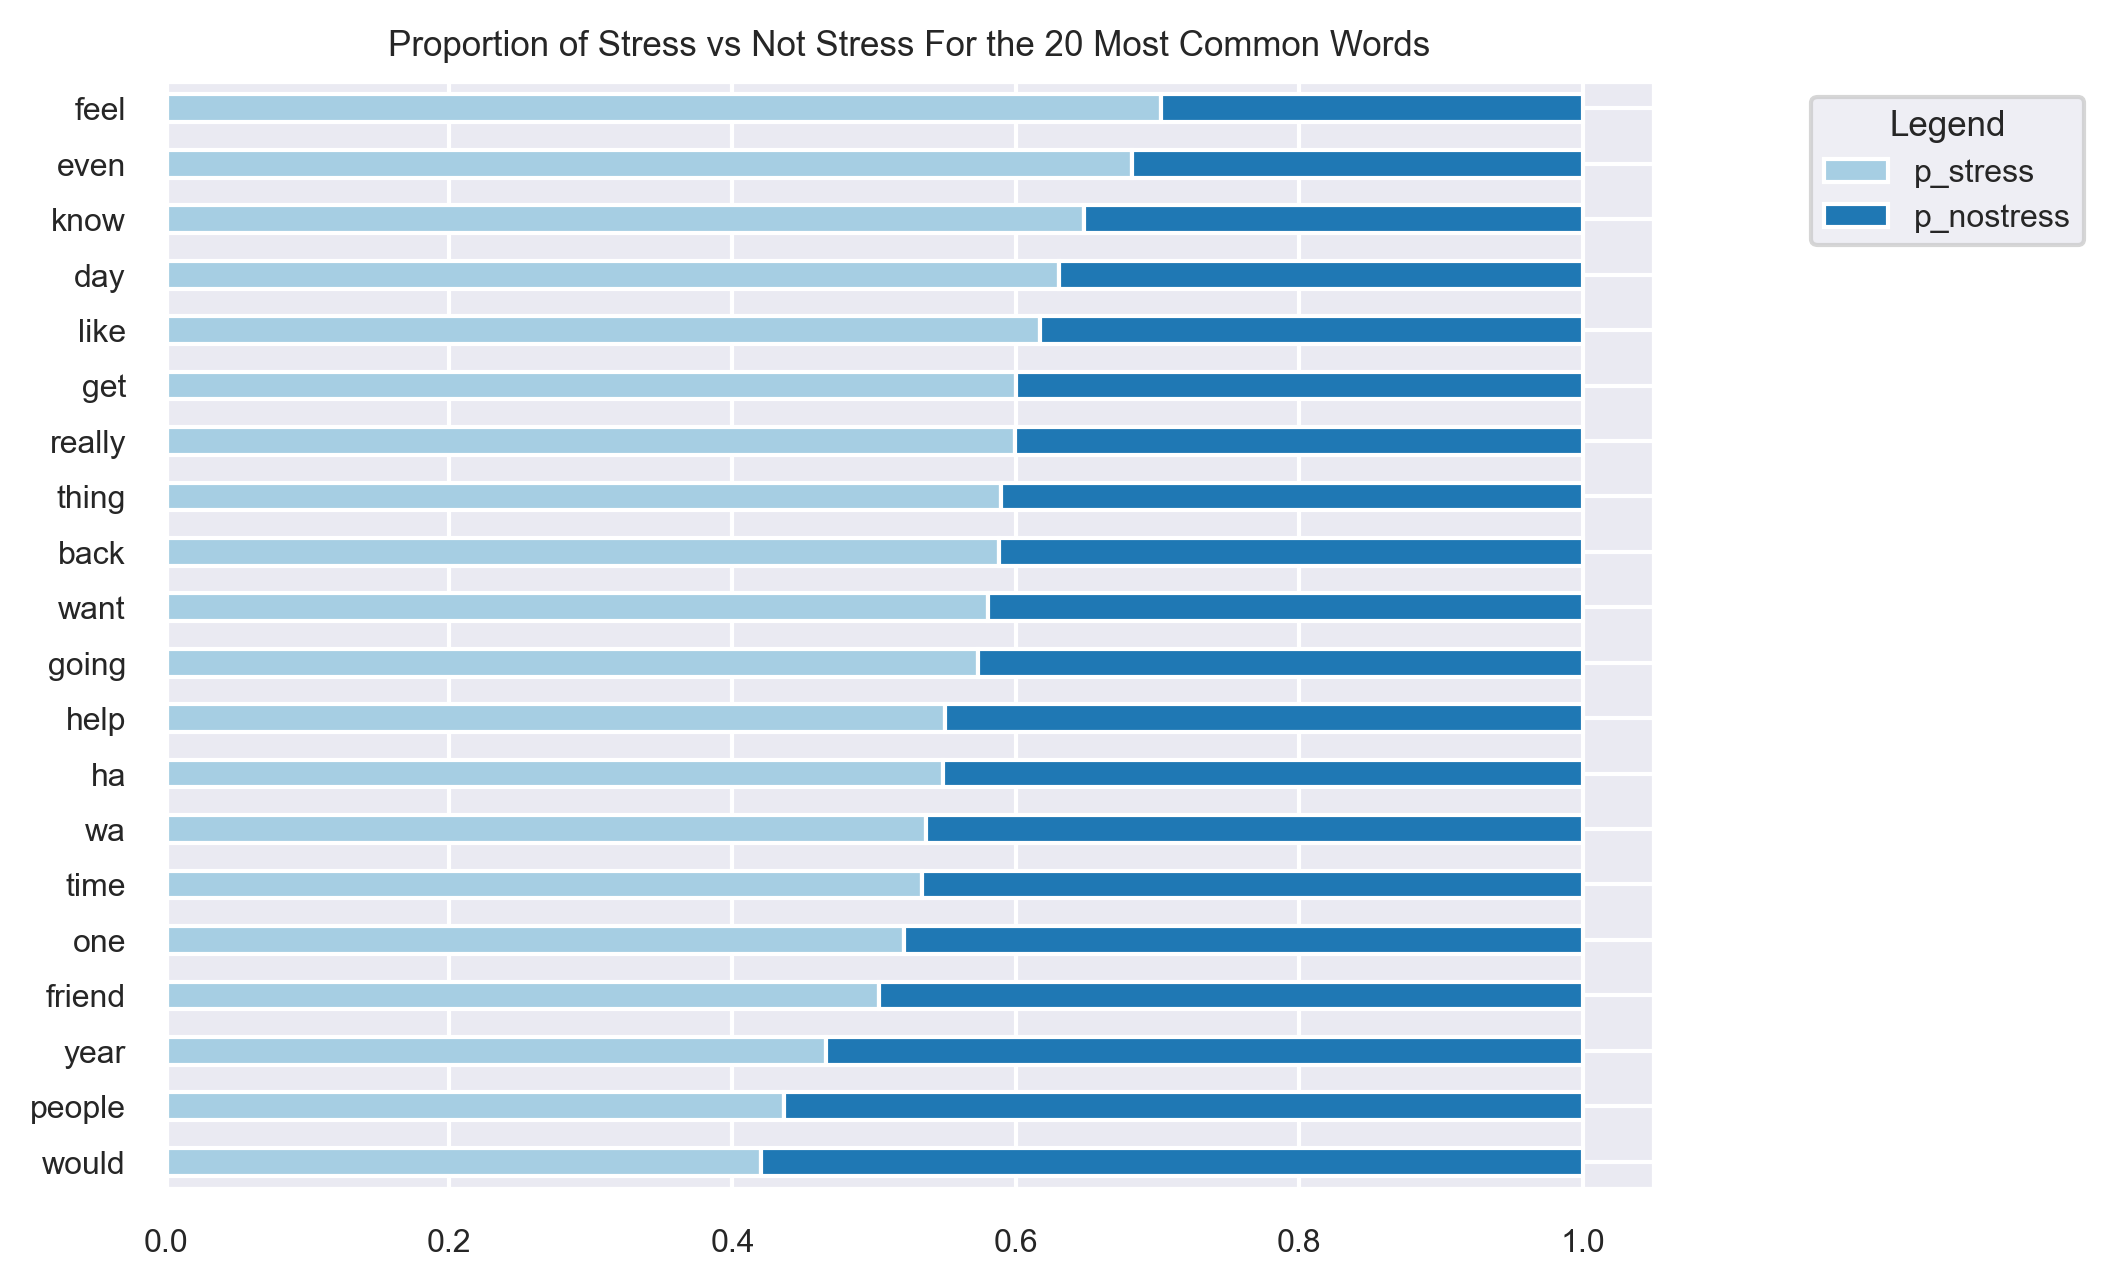

In [122]:
# visualizing the text data by target variable

# figuring out the percentage of stress vs not_stress
sns.set_palette('Paired', 2)

(word_counts \
    .assign(
        p_stress=word_counts['stress'] / word_counts['all_words'],
        p_nostress=word_counts['not_stress'] / word_counts['all_words']) \
            .sort_values(by='all_words')[['p_stress', 'p_nostress']] \
                .tail(20) \
                    .sort_values('p_stress') \
                        .plot.barh(stacked=True))

plt.legend(title='Legend', loc='upper right', bbox_to_anchor=(1.3, 1))
plt.title('Proportion of Stress vs Not Stress For the 20 Most Common Words')
plt.show()

In [123]:
# viewing the ratio of stress vs. non-stress word use as a dataframe
# where ratio = stress to non-stress outcomes

(word_counts
    [(word_counts["stress"] > 10) & (word_counts["not_stress"] > 10)] \
        .assign(ratio=lambda df: df["stress"] / (df["not_stress"] + .01)) \
            .sort_values(by='ratio') \
                .pipe(lambda df: pd.concat([df.head(), df.tail()])))

all_words  stress  not_stress     ratio
url             87      12          75  0.159979
met             62      11          51  0.215644
others          60      12          48  0.249948
thank           68      16          52  0.307633
share           50      14          36  0.388781
fucking         55      43          12  3.580350
afraid          51      40          11  3.633061
attack          74      60          14  4.282655
panic           59      48          11  4.359673
cant            85      72          13  5.534204

`Observations & Insights`

- When Reddit users use words like 'can't', 'panic', 'attack', 'afraid', or 'fucking' - they are approximately 550%, 430%, 420%, 360%, and 350% respectively **MORE LIKELY** associated to 'stress' related outcomes than 'non-stress' related outcomes

- Conversely, when users use words such as 'url', 'met', 'others', 'thank', or 'share' - they are approximately 85%, 79%, 76%, 70%, and 62% **LESS LIKELY** to end in stress related outcomes

- It appears that there are still words that may be telling or biasing of a particular target variable outcome. Words like 'panic', 'afraid', 'attack' are potentially telling of some degree of stress. 


<u>**Notes:**</u>

- Determine whether '10' is an appropriate word count number to base ratios off of?

- Determine if and how the interpretation of these ratios would change should these would be used simultaneously, in the same message, or are more meaninful when used together. 

- Are words like "others", "thank", and "share" indicative of non stress related outcomes? If so, what implications or impact does this currently/will have?

----

### ``Word Clouds``

In [125]:
# step 1: combine the list of text to a single string of text using the 

all_text = ' '.join(all_words)

# test
type(all_text)

str

In [126]:
# combining the stress and no-stress words to single string

stressful_text = ' '.join(stressful_words)
nostress_text = ' '.join(nostress_words)

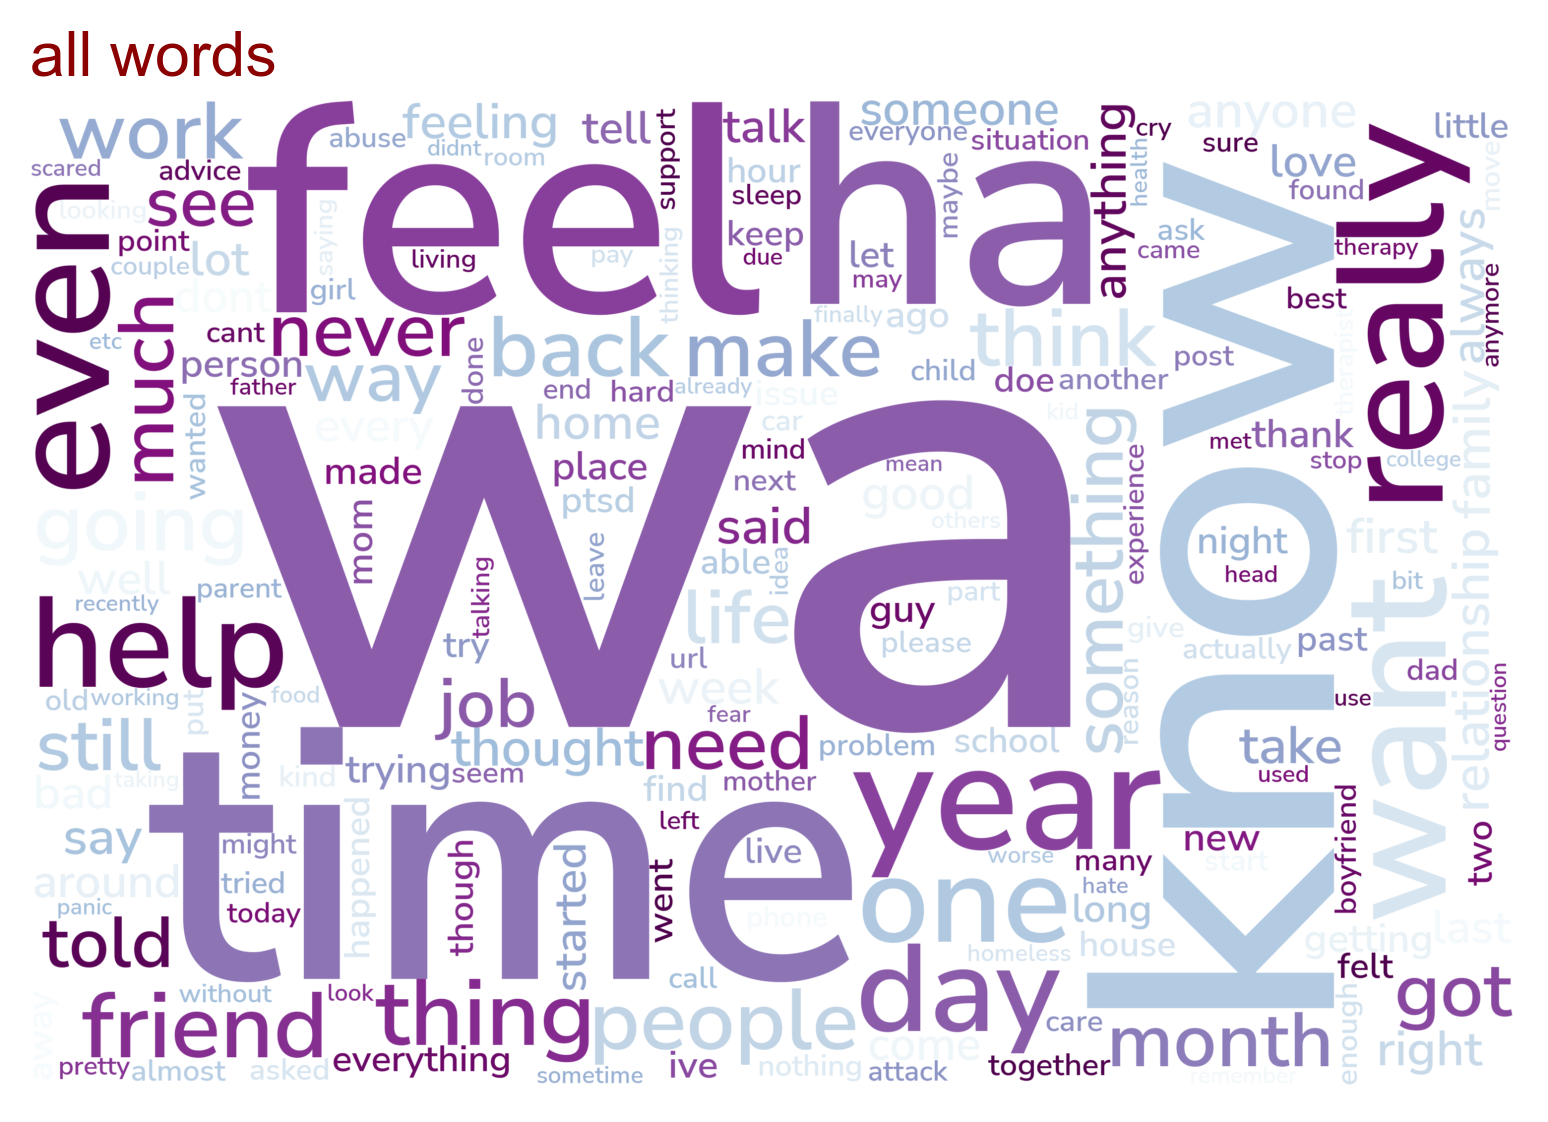

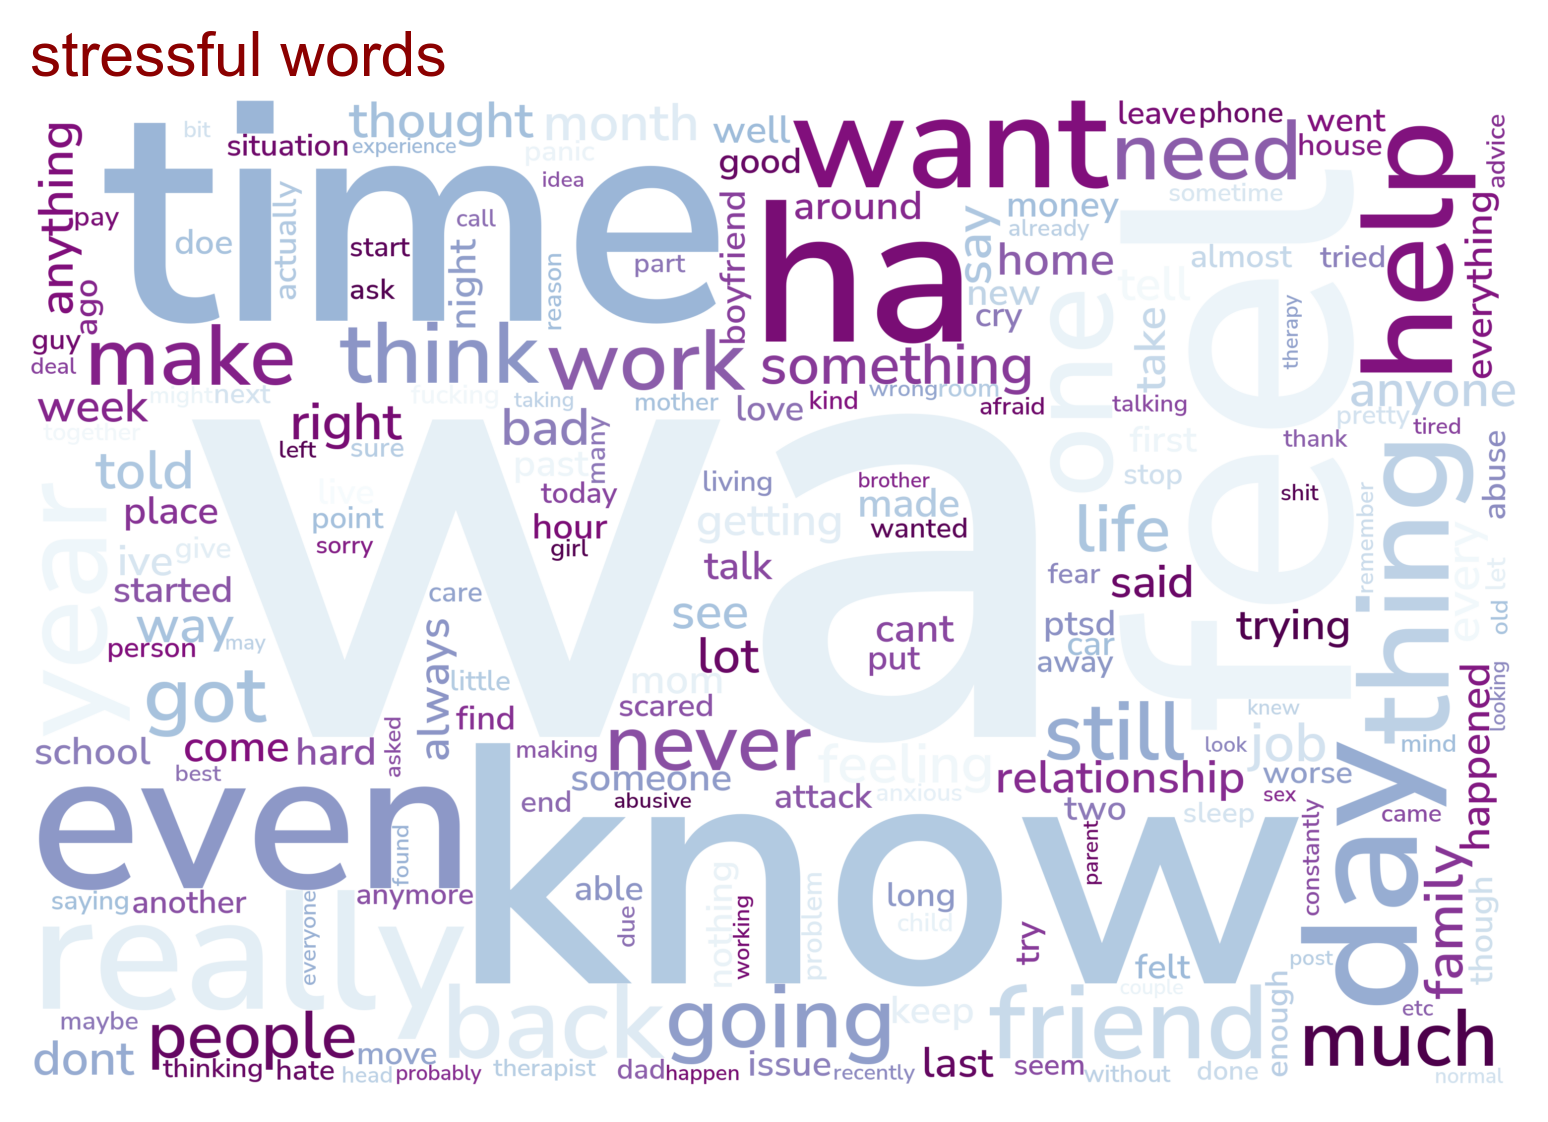

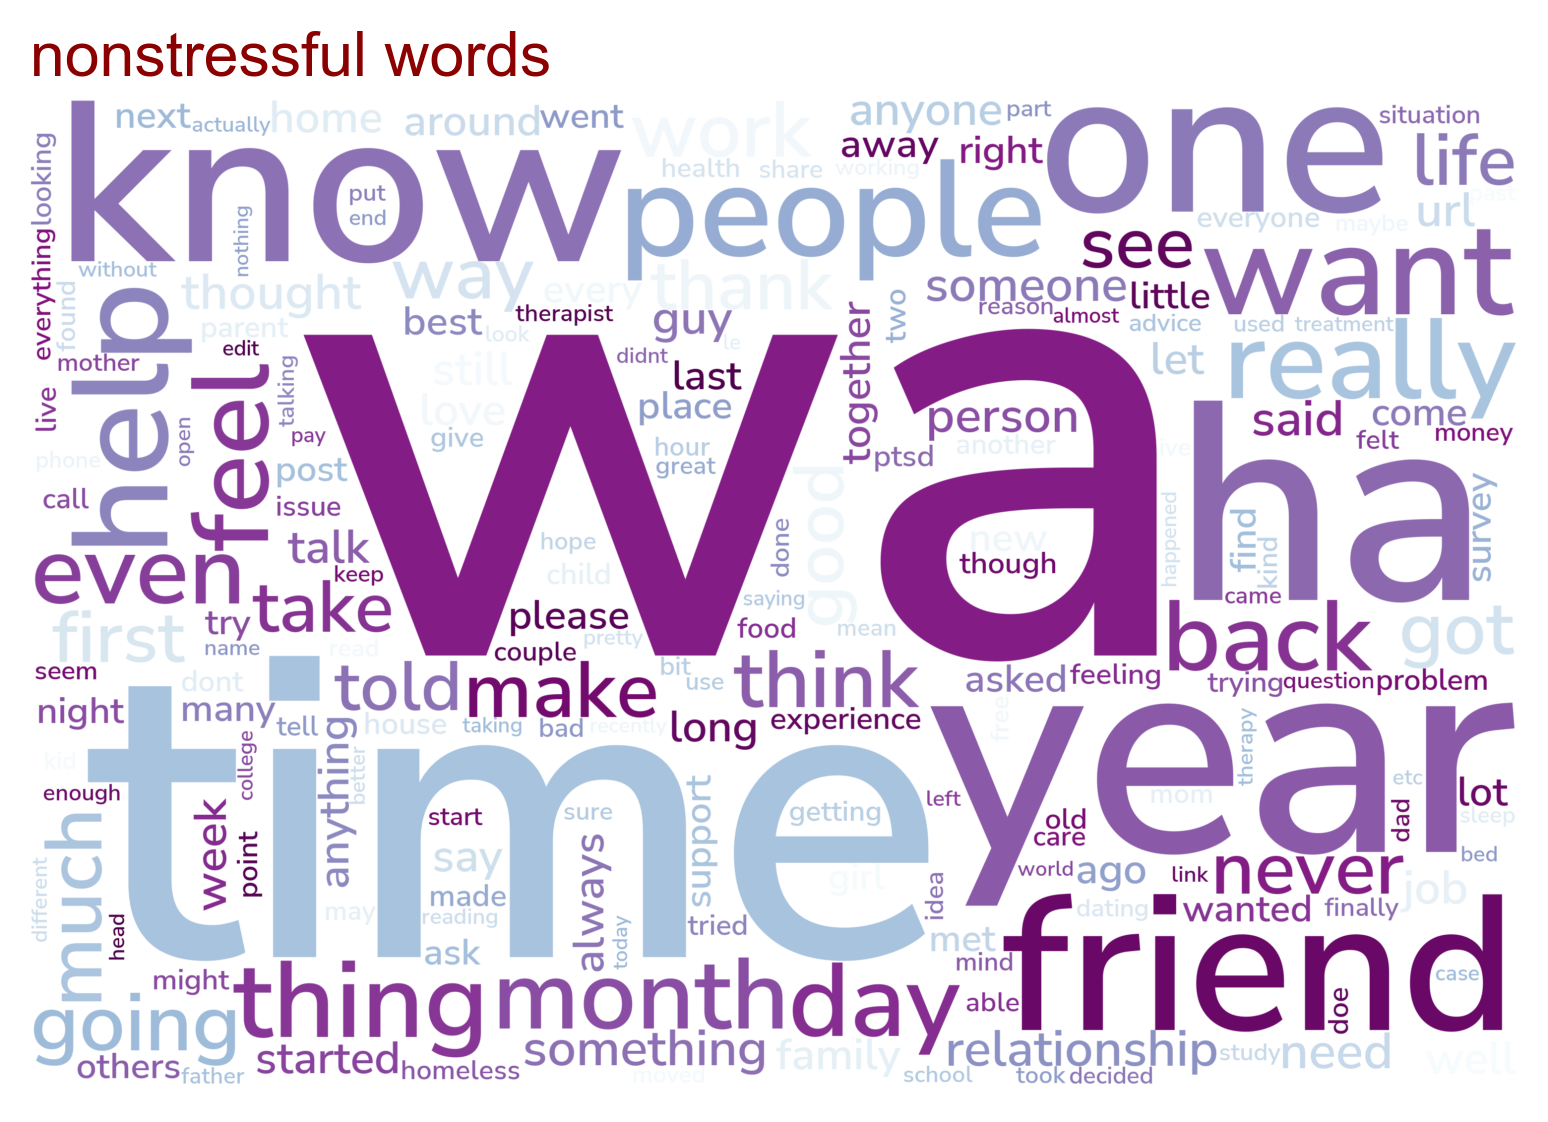

In [142]:
# creating word cloud object and iterating through programming language frequency words
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud


tfidf = TfidfVectorizer()

# change the value to black
# def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
#     return("hsl(0,100%, 1%)")

frames = [
        all_text, 
        stressful_text,
        nostress_text]

titles = [
    "all words", 
    "stressful words", 
    "nonstressful words"]

counter = 0

for frame in frames:

    # creating the object
    # set the wordcloud background color to white
    # set max_words to 1000
    # set width and height to higher quality, 3000 x 2000
    
    wordcloud = WordCloud(
        font_path = '/Library/Fonts/NunitoSans-SemiBold.ttf', 
        collocations = False,
        colormap = "BuPu_r", 
        background_color = "white", 
        width = 3000, height = 2000).generate(frame)

    # set the word color to black
    # wordcloud.recolor(color_func = black_color_func)

    plt.title(f'{titles[counter]}', fontsize = 15, loc = "left", color = "darkred")
    plt.imshow(wordcloud, interpolation = "bilinear")
    plt.axis("off")

    # update counter
    counter += 1
   
    plt.show()

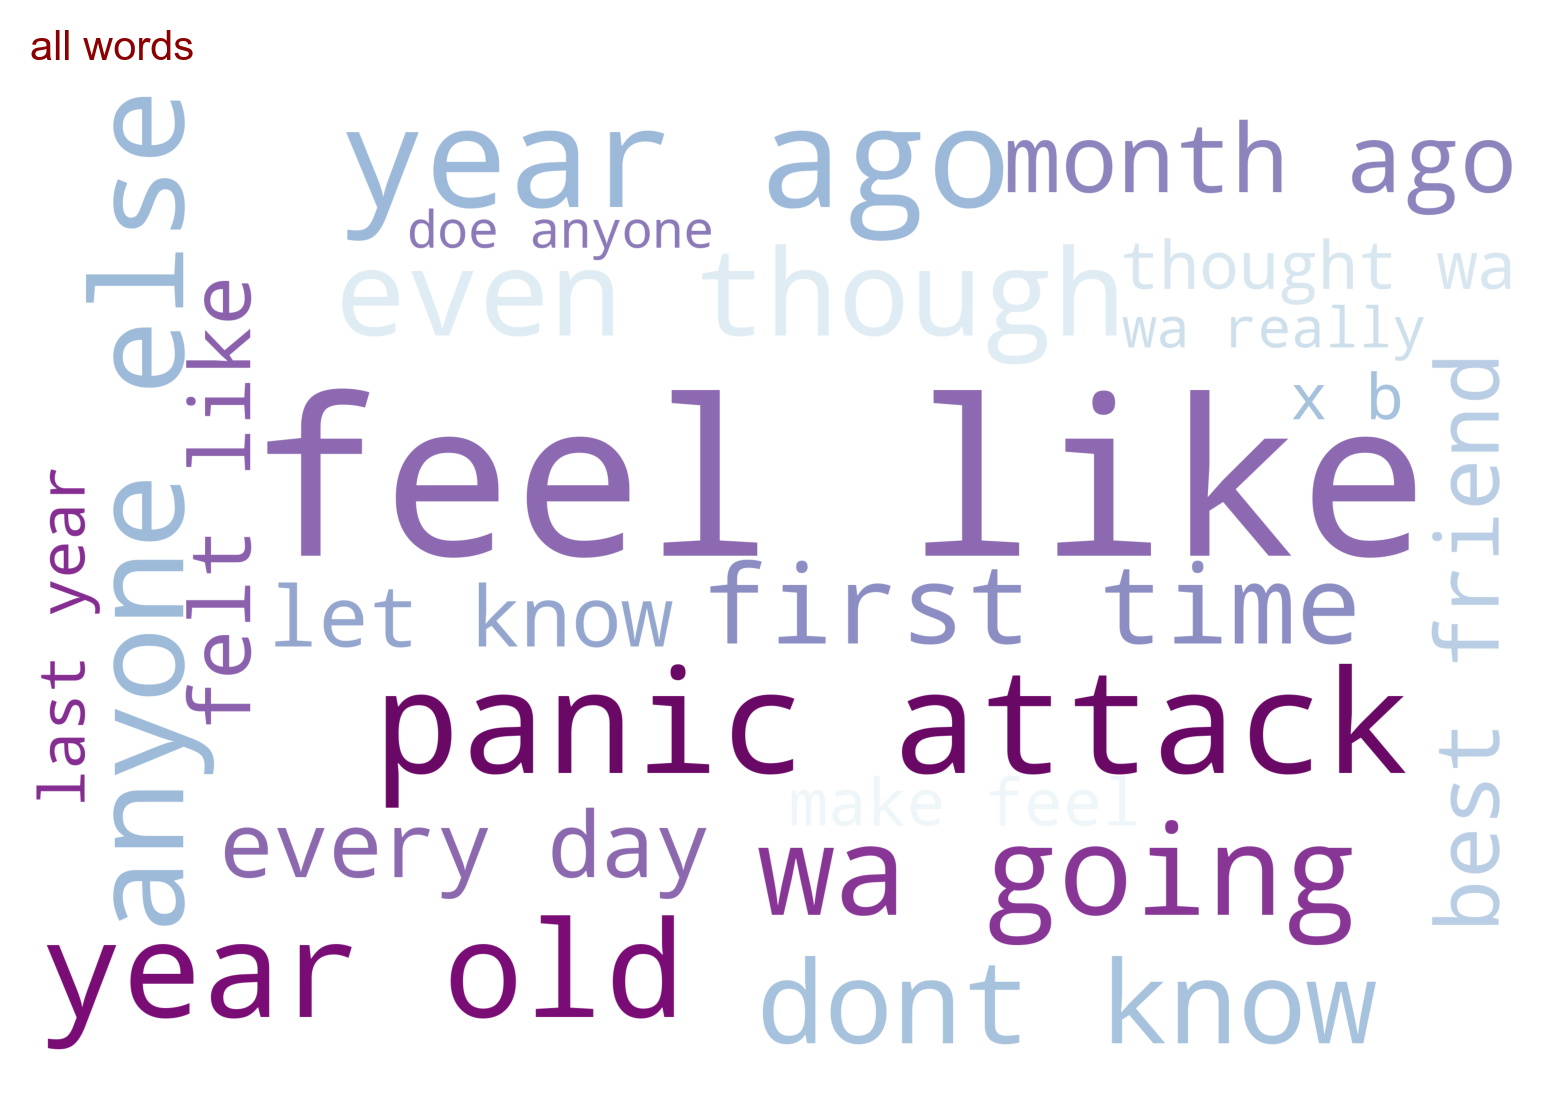

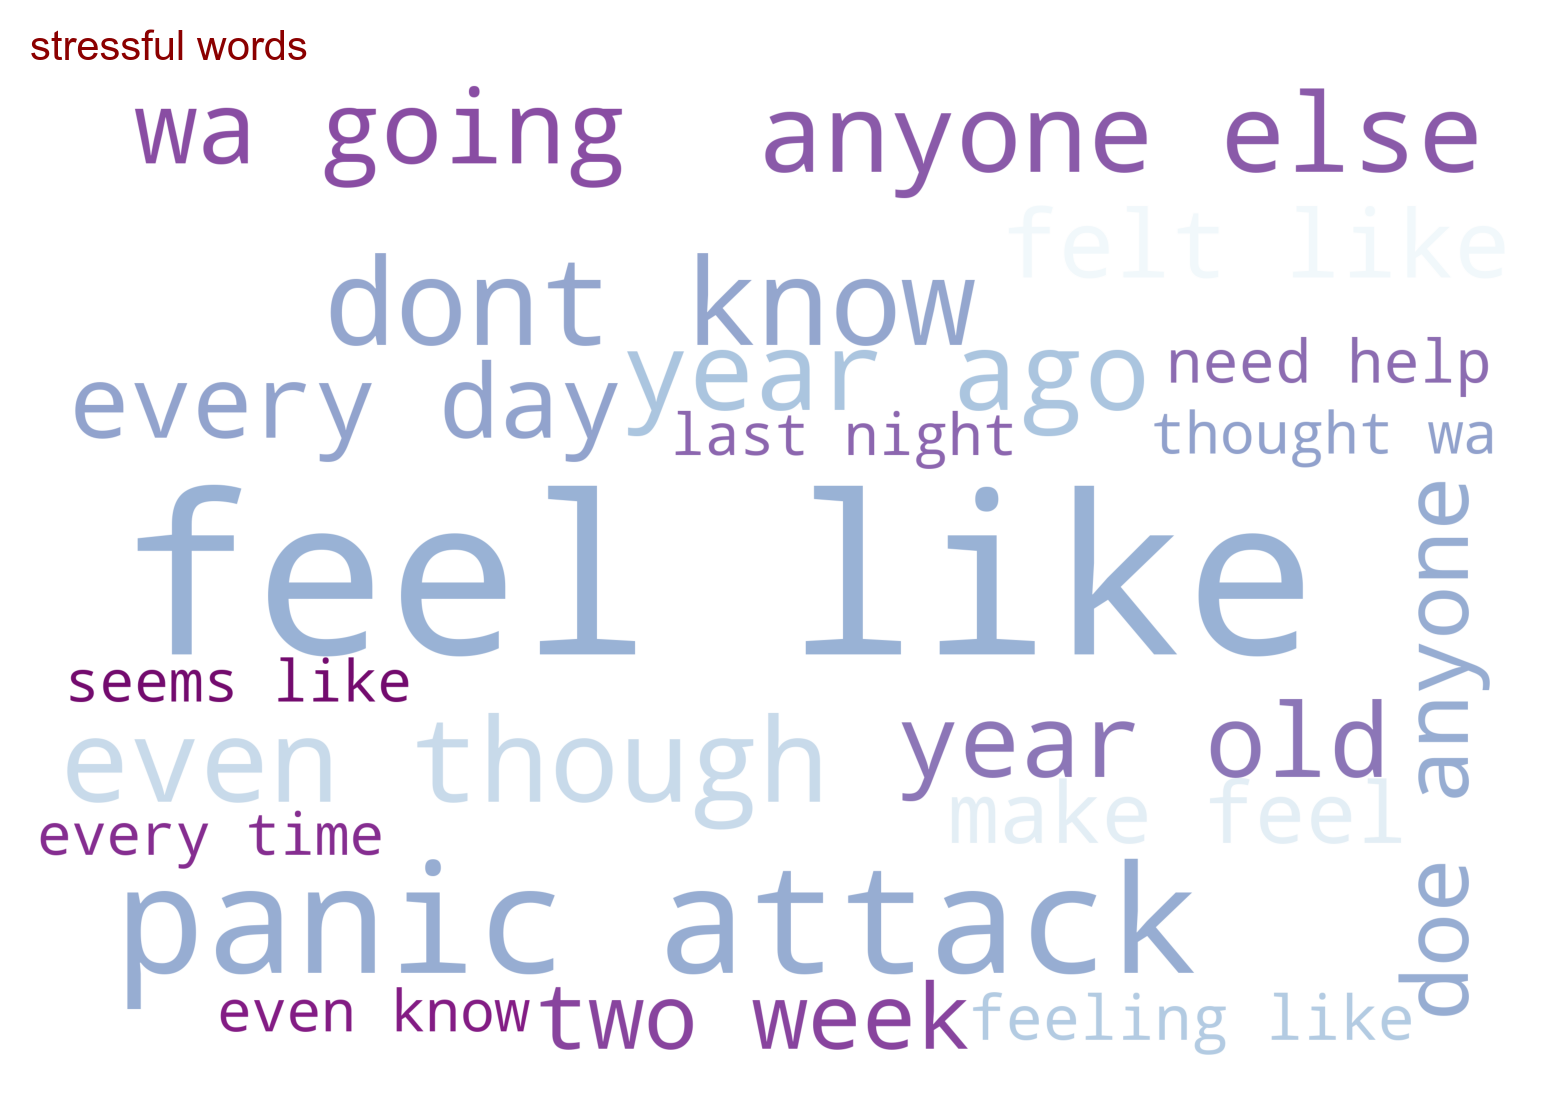

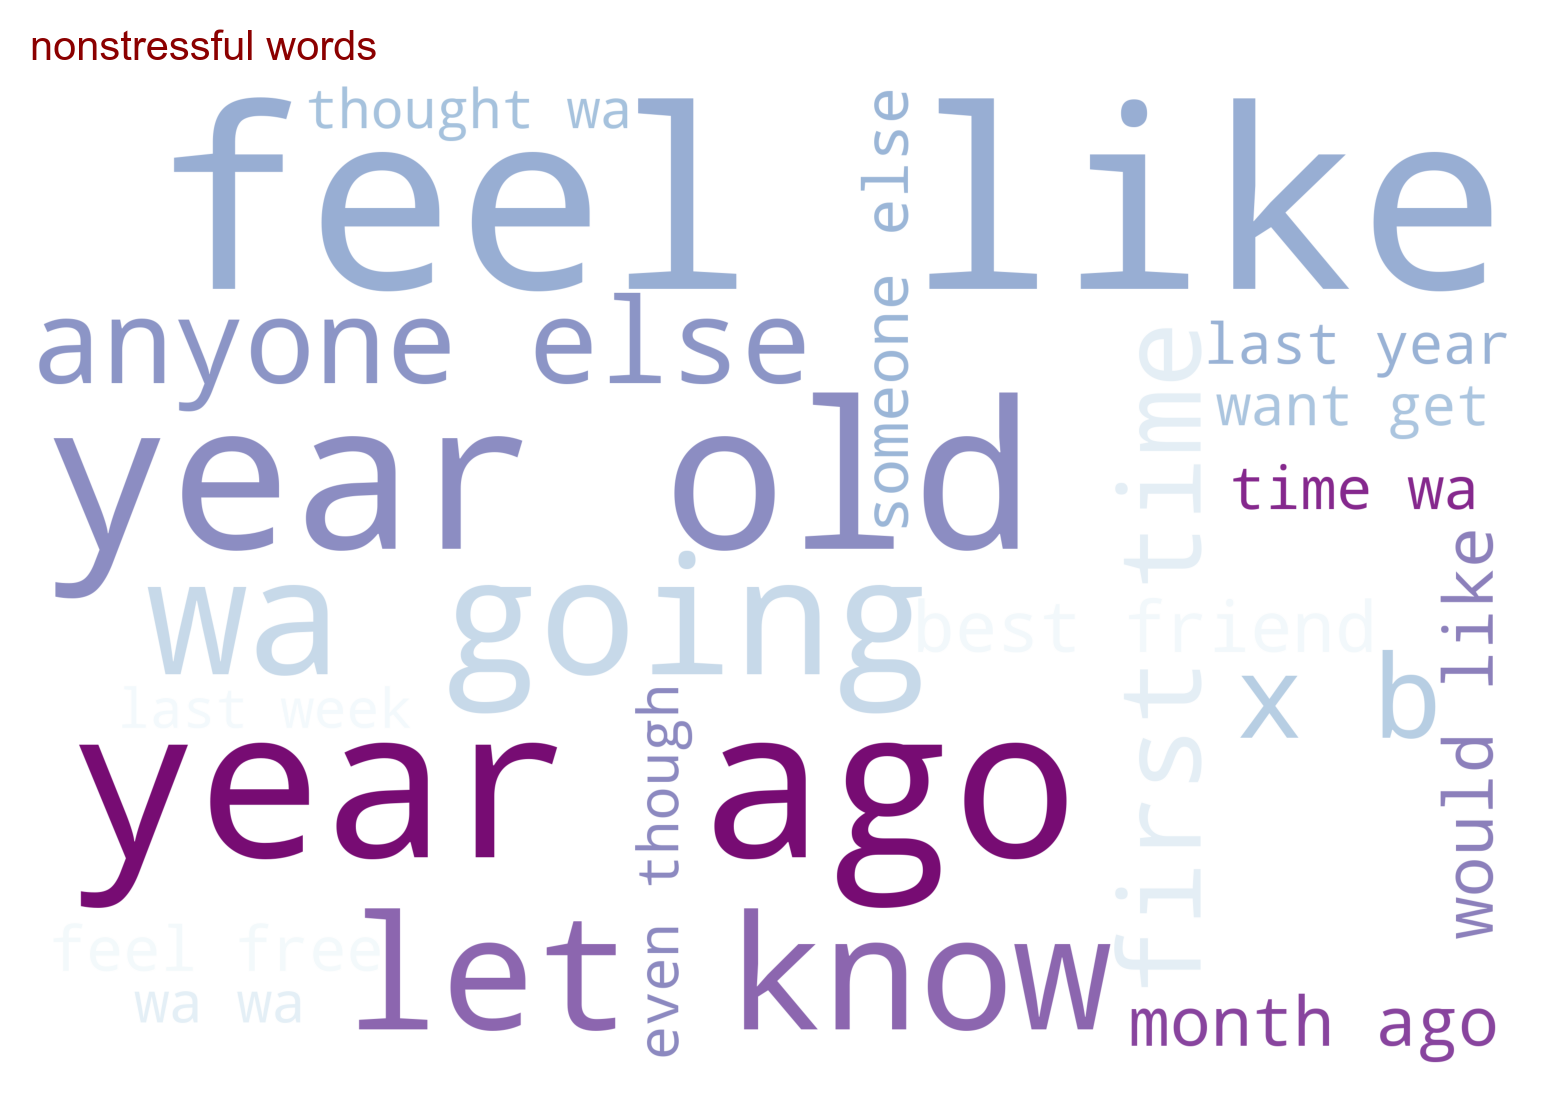

In [144]:
# bi-grams
# the following code will require the series of words to be passed as a list

frames = [
        all_words, 
        stressful_words,
        nostress_words]

titles = [
    "all words", 
    "stressful words", 
    "nonstressful words"]


for i, text in enumerate(frames):
        
    # creating the top 20 trigrams for ea. text series
    top_20_bigrams = (pd.Series(nltk.ngrams(text, 2))
                .value_counts()
                .head(20))
   
    # extracting top 2 simulataneously seen words in ea. series (all, stress, nonstress)         
    data = {k[0] + ' ' + k[1]: v for k, v in top_20_bigrams.to_dict().items()}
    
    img = WordCloud(
        background_color='white',
        collocations = False, 
        colormap = "BuPu_r",
        width=3000, height=2000).generate_from_frequencies(data)

    plt.title(titles[i], loc = "left", fontsize = 10, color = "darkred")
    plt.imshow(img)
    plt.axis('off')
    plt.show()

----
### ``Modeling``

**``Inverse Document Frequency (IDF)``**

Inverse Document Frequency provides information about individual words. In order to use this measure there must be 'multiple documents' i.e. several different bodies of text. 

``Two Potential Approaches``

1. Trest individual subreddit messages as single 'documents'
2. Treat the entire target variable text/corpus as individual documents

Inverse Document Frequency tells us how much information a word provides. It is based on how commonly a word appears across multiple documents/bodies of text. ``The metric is divised such that the more frequently a word appears, the lower the IDF for that word will be.``

#### idf(word) = log(# of documents / # of documents containing the word)

**<u>Note:</u>** If a given word doesn't appear in any documents, the denominator in the equation above would be zero, so some definitions of idf will add 1 to the denominator.

In [147]:
documents = {
    'news': 'Codeup announced last thursday that they just launched a new data science program. It is 18 weeks long.',
    'description': 'Codeup\'s data science program teaches hands on skills using Python and pandas.',
    'context': 'Codeup\'s data science program was created in response to a percieved lack of data science talent, and growing demand.'
}

documents.values()

dict_values(['Codeup announced last thursday that they just launched a new data science program. It is 18 weeks long.', "Codeup's data science program teaches hands on skills using Python and pandas.", "Codeup's data science program was created in response to a percieved lack of data science talent, and growing demand."])

In [151]:
# using approach #2: target variable corpus as documents
# step 1: create a dictionary from frames, and labels

frames = [
        stressful_text,
        nostress_text]

labels = [ 
        "stressful_text",
        "nonstress_text"
]

documents = {}

for label in labels:
    
    for frame in frames:

        documents[label] = frame
        
        frames.remove(frame)

        break

# verify newly created dictioary 
print("Resulting dictionary is : " + str(documents))

Resulting dictionary is : {'stressful_text': 'suffered mild diagnosed year logical rational fault generally supportive cannot understand feel act suffering particularly bad matter try explain tell literally cannot help magically lift insists dramatic make feel vulnerable difficult speak advise experience helping someone understand ha never experienced real active control victim feel like cannot trust anyone truly feel never felt sort platonic romantic love still feel much interacting anyone especially show interest ha one thing helped realize imagine however family deeply opposed potential new employer always going ask got kicked academy soon drug mentioned fucking way compete anyone else probably want talk one boss fired reference see lying doubt could cover top fucking way back hometown family embarrassed let really proud telling everyone living apologizes point later first instinct always blame often thing blaming exaggerated made look like routine flaw even thing hesitate show bad 

In [152]:
# a simplified way to calculate idf for demonstration
# note that this function relies on the globally defined documents variable


def idf(word):
    n_occurences = sum([1 for doc in documents.values() if word in doc])
    return len(documents) / n_occurences

# Get a list of the unique words
unique_words = pd.Series(' '.join(documents.values()).split()).unique()

# put the unique words into a data frame
(pd.DataFrame(dict(word=unique_words)) \
 # calculate the idf for each word
 .assign(idf=lambda df: df.word.apply(idf)) \
 # sort the data for presentation purposes
 .set_index('word') \
 .sort_values(by='idf', ascending=False) \
 .head(10))

idf
word             
insured       2.0
motorcycle    2.0
logo          2.0
affiliation   2.0
researcher    2.0
downplay      2.0
citalopram    2.0
welcoming     2.0
independence  2.0
handed        2.0

----
### **``TF-IDF``**

``TF-IDF (Term Frequency-Inverse Document Frequency``

- TF-IDF is often used as a weighting factor in information retrieval and text mining because it takes into account both the frequency of a word in a document and the importance of the word across a collection of documents.

- Words that are common in a document but rare across the collection of documents are given a higher weight, while words that are common across the collection of documents are given a lower weight. This can be useful for tasks such as document classification and text summarization, where the most important words in a document need to be identified.

Calculating an TF-IDF for all of the words and documents:

In [153]:
# caclulate the tf-idf value for every word across every document

tfs = []

# itereate over all the documents
for doc, text in documents.items():

    # step 01: make a dataframe that contains the tf for every word in every document/frame
    df = (pd.Series(text.split())
          .value_counts() \
          .reset_index() \
          .set_axis(['word', 'raw_count'], axis=1, inplace=False) \
          .assign(tf=lambda df: df.raw_count / df.shape[0]) \
          .drop(columns='raw_count') \
          .assign(doc=doc)) \
    
    # step 02: add that data frame to our list
    tfs.append(df)

# step 03: concatenate all the tf values together
(pd.concat(tfs)
 # step 04: calculate the idf value for each word
 .assign(idf=lambda df: df.word.apply(idf)) \
 # step 05: use the if and idf values to calculate tf-idf 
 .assign(tf_idf=lambda df: df.idf * df.tf) \
 .drop(columns=['tf', 'idf']) \
 .sort_values(by='tf_idf', ascending=False))

word             doc    tf_idf
0           wa  stressful_text  0.140862
0           wa  nonstress_text  0.115494
1         like  stressful_text  0.080607
2         know  stressful_text  0.069832
3         feel  stressful_text  0.064046
...        ...             ...       ...
3896  declined  nonstress_text  0.000190
3892   tending  nonstress_text  0.000190
3889    seated  nonstress_text  0.000190
3888    reject  nonstress_text  0.000190
5272      hero  nonstress_text  0.000190

[10285 rows x 3 columns]